First, Before discussing Makie.jl/GLMakie.jl, let's understand Julia.

It's an amazing Language. But how and why am I using it in an 'ipynb' (interactive python notebook)!?

Jupiter notebooks are convenient for such communicative notes. Simply because I can go back to previous codes, write comments, markdown notes, and what not. It isn't much different from using VSCode with a selection run (`Shift + Enter`). But I like it.

So, essentially, this is a normal ipynb but we can always select our Kernel of choice for running the code within the notebook. Julia, as it happens, is a compatible kernel. You would see `Julia 1.10.3` on top (at least I do, since that is my current version). On the botton, you can see your Currently selected Julia environment. This is what would be running the jupiter notebook. (The same way selection run works)

So, let's first start with the environment shall we? Where exactly are we and what do we have in hand?

In [1]:
pwd() # I am within my folder of choice

"e:\\Programming\\Canvas"

In [2]:
using Pkg:status #Import the status() function from the Pkg module

In [3]:
status()

Status `C:\Users\DELL\.julia\environments\Canvas\Project.toml`
  [5ae59095] Colors v0.13.0
  [e9467ef8] GLMakie v0.11.3
  [5c1252a2] GeometryBasics v0.5.5


Now... there is quite a bit to digest here. How am I in an environment that is not in the same directory as my folder but instead the base folder of julia (`C:\Users\DELL\.julia\environments\Canvas\Project.toml`)?

I discovered this not so long ago... Shared environments. Essentially, you can create a globally accessible environment in Julia... which essentially means a space where you have certain packages of choice added for access.

Usually, you would have to open julia in the cmd as

```shell
julia
```
and you would then activate your environment as

```jldoctest
] activate "path/to/environment" # for instance ] activate .
```

But for a shared environment, you say

```jldoctest
] activate @SharedEnvironment # Or equivalently ] activate --shared SharedEnvironment
```

This way, you don't have to keep a note of the environment location each time since shared environments are accessable from the root julia session too (since it is in the same folder... they sahre the same `DEPOT_PATH`)

---

Anyways, now that we know where we are, let's begin playing around with Makie. I will import only a handful of things to keep it fast (since Makie is a heavy package).

<details>
  <summary>Makie.jl vs GLMakie.jl vs CairoMakie.jl</summary>

Makie.jl, GLMakie.jl, CairoMakie.jl are all plotting libraries
CairoMakie is a backend for Makie.jl that uses Cairo.jl to render plots
GLMakie is a backend for Makie.jl that uses OpenGL to render plots
GLMakie is usually used for 3D/interactive plots and CairoMakie is usually used for 2D/static plots
Makie.jl is a plotting library that uses GLMakie.jl or CairoMakie.jl as a backend

It is all pretty comfusing but I usually just stick to GLMakie    
</details>

In [4]:
using GLMakie:Scene, scatter!

In [5]:
methods(Scene)

# 4 methods for type constructor:
 [1] Scene(; viewport, events, clear, transform_func, camera, camera_controls, transformation, plots, children, current_screens, parent, visible, ssao, lights, theme, deregister_callbacks, theme_kw...)
     @ C:\Users\DELL\.julia\packages\Makie\ux0Te\src\scenes.jl:210
 [2] Scene(parent::Scene; events, viewport, clear, camera, visible, camera_controls, transformation, kw...)
     @ C:\Users\DELL\.julia\packages\Makie\ux0Te\src\scenes.jl:301
 [3] Scene(parent::Scene, area; kw...)
     @ C:\Users\DELL\.julia\packages\Makie\ux0Te\src\scenes.jl:361
 [4] Scene(parent::Union{Nothing, Scene}, events::Makie.Events, viewport::Observables.Observable{GeometryBasics.HyperRectangle{2, Int64}}, clear::Observables.Observable{Bool}, camera::Makie.Camera, camera_controls::Makie.AbstractCamera, transformation::Makie.Transformation, plots::Vector{MakieCore.AbstractPlot}, theme::MakieCore.Attributes, children::Vector{Scene}, current_screens::Vector{MakieCore.MakieScreen}, backgroundcolor::Observables.Observable{ColorTypes.RGBA{Float32}}, visible::Observables.Observable{Bool}, ssao::Makie.SSAO, lights::Vector; deregister_callbacks)
     @ C:\Users\DELL\.julia\packages\Makie\ux0Te\src\scenes.jl:98

the `methods(Struct)` function (along with `names(module, all=true)`) can be helpful starters when understanding the ways to construct a struct and know its methods.

### Creating a Scene and Plotting points in the Scene

In [6]:
#Usually, I just define a very simply Scene
scene = Scene(size=(800, 600), backgroundcolor=:white)

#This should open a window with white background and 800x600 pixels

In [7]:
using GLMakie:Point2f #very useful
points = [Point2f(0, 0), Point2f(1, 1), Point2f(-1, 0)]
scatter!(scene, points, color=[:red, :blue, :green], markersize=25)

nothing #This suppresses the output for the scatter! function
#this would scatter a red point in the center and a blue point in the upper right corner and a green point in the lower left corner

These are called Normalized Device Coordinates - a very standard coordinate system used by OPENGL (the backend of GLMakie.jl) which has the entire window bound with x and y values of $[-1,1]$

In [8]:
x_values = [0,1,-1]
y_values = [0,1,0]
scatter!(scene, x_values, y_values, color=[:red, :blue, :green], markersize=25)

nothing
#This would do the same thing. You can either give a list of paired coordinates or lists of corresponding x and y coordinates

In [9]:
using GLMakie:lines!
lines!(scene, x_values, y_values, color=:black)

nothing
# This would draw a black line connecting the points

#### Defining your own Markers

In [10]:
#You can define your own Markers with GeometryBasics (packed with GLMakie as GLMakie.GeometryBasics)

using GLMakie: GeometryBasics, Scene, scatter!, Point2f, Circle, display

s = Scene(size=(800,400))

#Default marker
scatter!(s, (-1,0), marker=Circle, markersize=400, color=:blue)  # Diameter 400px

#Defining Custom Markers
myCircle1 = GeometryBasics.Polygon(GeometryBasics.decompose(Point2f, Circle(Point2f(0), 1)))
myCircle2 = GeometryBasics.Polygon(Circle(Point2f(0), 1))

#Plotting with Custom Markers
scatter!(s, (0,0), marker=myCircle1, markersize=200, color=:green)  
scatter!(s, (1,0), marker=myCircle2, markersize=200, color=:red)  


display(s)
nothing

#You will notice all 3 have the same dimensions even though `markersize` is different for the Default and Custom markers 

In [11]:
[myCircle1, myCircle2] #This will show you the difference between the two custom markers

2-element Vector{GeometryBasics.Polygon{2, Float32}}:
 GeometryBasics.Polygon{2, Float32}(GeometryBasics.Point{2, Float32}[[1.0, 0.0], [0.99503076, 0.099567845], [0.9801725, 0.19814615], [0.9555728, 0.29475516], [0.9214762, 0.3884348], [0.8782216, 0.478254], [0.82623875, 0.56332004], [0.76604444, 0.64278764], [0.6982368, 0.71586686], [0.6234898, 0.7818315]  …  [0.6234898, -0.7818315], [0.6982368, -0.71586686], [0.76604444, -0.64278764], [0.82623875, -0.56332004], [0.8782216, -0.478254], [0.9214762, -0.3884348], [0.9555728, -0.29475516], [0.9801725, -0.19814615], [0.99503076, -0.099567845], [1.0, -2.4492937f-16]], Vector{GeometryBasics.Point{2, Float32}}[])
 GeometryBasics.Polygon{2, Float32}(GeometryBasics.Point{2, Float32}[[1.0, 0.0], [0.99503076, 0.099567845], [0.9801725, 0.19814615], [0.9555728, 0.29475516], [0.9214762, 0.3884348], [0.8782216, 0.478254], [0.82623875, 0.56332004], [0.76604444, 0.64278764], [0.6982368, 0.71586686], [0.6234898, 0.7818315]  …  [0.6234898, -0.7818315], [

As you can see, both ways of creating the custom marker are the same. Both create a Polygon object that consists of the vertices describing the `Circle` object in this case.

The Vertices are defined for a Unit Circle. Plotting it as a marker with `markersize=200` filling up a (400px,400px) window means **markersize factor (200 in this case) means a unit square in the markerspace must be scaled up so as to occupy (200px,200px) in screen space**.

I suspect `marker=Circle` by default would create a circle of Diameter=1 (and hence radius=0.5)
(https://docs.makie.org/dev/reference/plots/scatter#markersize does say Circle and Square marker defaults are meant to be of size 1x1)

(I would touch more on `space`. But as a side note, there are parameters of `markerspace` and `space` that further define these scaling relations)

usually, you do want to play around with things and see how they work with various size parameters to better know the default settings and behaviours in hand

---

#### More Complicated Examples

In [12]:
using GLMakie: Scene, scatter!, display, text!, @L_str
using GLMakie: Point, Point2f, EllipticalArc, MoveTo, LineTo, ClosePath, BezierPath, Circle, GeometryBasics
using GLMakie: theme_dark, theme_latexfonts, merge
using Colors: RGBA

# The following is a BezierPath string for the Batman symbol
batsymbol_string = "M96.84 141.998c-4.947-23.457-20.359-32.211-25.862-13.887-11.822-22.963-37.961-16.135-22.041 6.289-3.005-1.295-5.872-2.682-8.538-4.191-8.646-5.318-15.259-11.314-19.774-17.586-3.237-5.07-4.994-10.541-4.994-16.229 0-19.774 21.115-36.758 50.861-43.694.446-.078.909-.154 1.372-.231-22.657 30.039 9.386 50.985 15.258 24.645l2.528-24.367 5.086 6.52H103.205l5.07-6.52 2.543 24.367c5.842 26.278 37.746 5.502 15.414-24.429 29.777 6.951 50.891 23.936 50.891 43.709 0 15.136-12.406 28.651-31.609 37.267 14.842-21.822-10.867-28.266-22.549-5.549-5.502-18.325-21.147-9.341-26.125 13.886z"

batsymbol = BezierPath(batsymbol_string, fit = true, flipy = true)
circle_with_hole = BezierPath([
    MoveTo(Point(1, 0)),
    EllipticalArc(Point(0, 0), 1, 1, 0, 0, 2pi),
    MoveTo(Point(0.5, 0.5)),
    LineTo(Point(0.5, -0.5)),
    LineTo(Point(-0.5, -0.5)),
    LineTo(Point(-0.5, 0.5)),
    ClosePath(),
])

square = BezierPath(GeometryBasics.Polygon([Point2f(-1, -1), Point2f(1, -1), Point2f(1, 1), Point2f(-1, 1)]))
# Equivalent to saying square = BezierPath(MoveTo(Point2f(-1, -1)), LineTo(Point2f(1, -1)), LineTo(Point2f(1, 1)), LineTo(Point2f(-1, 1)), ClosePath())


myCircle1 = GeometryBasics.Polygon(GeometryBasics.decompose(Point2f, Circle(Point2f(0), 1))) # myCircle1 definition from before
myCircle = BezierPath(myCircle1)

s = Scene(size=(800,400), theme=merge(theme_dark(), theme_latexfonts()))
scatter!(s, (0,0), marker=square, markersize=200, color=rand(RGBA))
scatter!(s, (0,0), marker=batsymbol, markersize=200, color=rand(RGBA))
scatter!(s, (1,0), marker=circle_with_hole, markersize=200, color=rand(RGBA))
scatter!(s, (-1,0), marker=myCircle, markersize=200, color=rand(RGBA))
text!(s, (0,0), text="I'm Batman", color=:white, fontsize=20, align=(:center, :center))
text!(s, [(0,1), (0,0.9), (0,0.8)], text=[L"---", L"\Chi \Sigma \Gamma", "Random Math Text"], align=(:center, :top), color=:white, fontsize=20)
display(s)
nothing

# It has been mentioned in the documentation that Markers use BezierPath under the hood too.

In [18]:
# With this alone along with a bit of added complexity, you can create something fun 

using GLMakie:activate!, Scene, scatter!, lines!, Point2f, RGBA

# Create the Window
activate!(title = "Complex Scene")
scene = Scene(size = (1280,720), backgroundcolor = "#09122C")


#Plot the Central Circlular Ring
using GLMakie:GeometryBasics, Circle, px
p_big = GeometryBasics.decompose(Point2f, Circle(Point2f(0), 1))
p_small = GeometryBasics.decompose(Point2f, Circle(Point2f(0), 0.5))

# This creates a circular ring at the center of the scene with outer radius 360px and inner radius 180px (1 and 0.5 in NDC)
circular_ring = GeometryBasics.Polygon(p_big, [p_small])
scatter!(scene, (0,0), color = RGBA(0.75, 0.25, 0.25, 0.95), marker = GeometryBasics.Polygon(p_big, [p_small]), markersize = 360px)
# scatter!(scene, (0,0), marker=Circle, markersize=720px) #Same size as the outer circle


# Generate 100 random points on the inner circle

#generate a mapping from pixel space ±(size(scene)./2 to NDC ±(1,1)
pixelToNDC = (p) -> p ./ (size(scene) ./ 2)

ringinnerradius = 360/2

PointsOnCircle(random_values) = [Point2f(cos(random_values[i] * 2pi), sin(random_values[i] * 2pi)) .* ringinnerradius for i in eachindex(random_values)]
randomPointsOnCirlce = pixelToNDC.(PointsOnCircle(rand(100)))


# Plot the random points
lines!(scene, randomPointsOnCirlce, color = [rand(RGBA) for _ in 1:100], linewidth = 2, fxaa=true, linecap=:round, joinstyle=:round)

display(scene)


using GLMakie:save
save("Complex Scene.png", scene) #

You can also use a simple **figure and axis** structure instead of Scenes which act in a similar way, providing a "canvas" for you to plot and scatter your objects in. A nice thing about these is **themes**. (Actually, Scenes do too as I demonstrated Earlier).

The real advantage of a plot is the axis that automatically builds a scale around the plotted values. But I think it is a clutter when wanting to plot things normally.

In [19]:
using GLMakie, GeometryBasics
n = 20
function ngonShape(h, k, r, n)
    Polygon([Point2f(h .+ r * sin.(m * 2π / n), k .+ r * cos.(m * 2π / n)) for m in 1:n])
end
polysCentric = [ngonShape(0, 0, 3 / i^1.5, i) for i in 3:n]
polysCircular = [ngonShape(√2 / 2 * sin(θ), √2 / 2 * cos(θ), 0.15 / √idx, idx + 2)
                    for (idx, θ) in enumerate(LinRange(0, 2π * (1 - 1 / (n - 2)), n - 2))]
cmap = cgrad(:Homer1, n)

with_theme(theme_dark()) do
    fig, ax, = poly(polysCentric; color = 1:n-2, colormap = cmap,
        axis = (; aspect = DataAspect()), figure = (; size = (600, 400)))
    poly!(polysCircular; color = 1:n-2, colormap = cmap)

    # Hiding the Grid lines and Spines so as to make the plot look cleaner - like a Scene
    hidedecorations!(ax; grid=true) #grid=false keeps the grid lines there
    hidespines!(ax)
    fig
end

There are many things you can create this way, refer to

<div align="center"><iframe src="https://beautiful.makie.org/dev/" title="Beautiful Makie" width=80% height=500px>
</iframe></div>

In [ ]:
using GLMakie: activate!
activate!(title = "Makie") # Revert to default title.

---

## Scene Spaces, Cameras, etc.

<div align="center"><iframe src="https://docs.makie.org/dev/explanations/scenes#Updating-the-Scene" title="Update Scene" width=80% height=500px>
</iframe></div>


<div align="center"><iframe src="https://docs.makie.org/dev/tutorials/scenes#Transformations-and-Scene-graph" title="Makie Scene Transformations" width=80% height=500px>
</iframe></div>



In [ ]:
using GLMakie: Scene, scatter!, Circle, display, text!

s1 = Scene()
scatter!(s1, (0, 0), marker = Circle, markersize = 200, color = :red)
scatter!(s1, (1, 0), marker = Circle, markersize = 200, color = :blue)
scatter!(s1, (-1, 0), marker = Circle, markersize = 200, color = :green)

display(s1)

GLMakie.Screen(...)

In [2]:
# Creating a standard number plane for visualization
using GLMakie: lines!, text!

# Draw a line at each  0.5 units in the x and y direction and at each point on the line intersection, write a text with the coordinate of point with respect to the origin, the default x and y range is (-10, 10) for both axes

function draw_number_plane(scene; x_range=[-10, 10], y_range=[-10, 10], step=0.5)
    for x in x_range[1]:step:x_range[2]
        lines!(scene, [x, x], y_range, color=:gray, linewidth=0.5) # vertical lines
    end
    for y in y_range[1]:step:y_range[2]
        lines!(scene, x_range, [y, y], color=:gray, linewidth=0.5) # horizontal lines
    end

    # Write the text for each intersection 
    for x in x_range[1]:step:x_range[2]
        for y in y_range[1]:step:y_range[2]
            text!(scene, (x, y), text="($x, $y)", color=:black, fontsize=8, align=(:center, :center))
        end
    end
end

draw_number_plane(s1, x_range=[-10, 10], y_range=[-10, 10], step=0.5)

In [3]:
fieldss1 = fieldnames(typeof(s1))

(:parent, :events, :viewport, :clear, :camera, :camera_controls, :transformation, :float32convert, :plots, :theme, :children, :current_screens, :backgroundcolor, :visible, :ssao, :lights, :deregister_callbacks, :cycler, :conversions, :isclosed)

If you notice, there are several options in hand to play here for your scene

In [4]:
s1.camera

Camera:
  0 steering observables connected
  pixel_space: [0.0033333333333333335 0.0 0.0 -1.0; 0.0 0.0044444444444444444 0.0 -1.0; 0.0 0.0 -0.0001 -0.0; 0.0 0.0 0.0 1.0]
  view: [1.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 1.0]
  projection: [1.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 1.0]
  projectionview: [1.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 1.0]
  resolution: Float32[600.0, 450.0]
  eyeposition: Float32[1.0, 1.0, 1.0]
  view direction: Float32[0.0, 0.0, -1.0]


https://docs.makie.org/dev/explanations/cameras#3D-Camera

From the above source, you can realise that the default camera (cam2d) doesn't have much controls. You are supposed to control 2D scenes rather than change the camera orientation in 2d scenes

But you can quite easily convert the scene into 2d by imposing a 3d camera onto the scene with
`cam3d!(scene)`

In [16]:
using GLMakie: cameracontrols, update_cam!, cam3d!, Vec3f, Point3f

cam3d!(s1)
camc = cameracontrols(s1)

# Now you have imposed a 3D camera on the scene
# You also have a camera control object that you can use to manipulate the camera

Makie.Camera3D(Attributes with 14 entries:
  cad => false
  center => true
  circular_rotation => (false, false, false)
  clipping_mode => adaptive
  fixed_axis => true
  keyboard_rotationspeed => 1.0
  keyboard_translationspeed => 0.5
  keyboard_zoomspeed => 1.0
  mouse_rotationspeed => 1.0
  mouse_translationspeed => 1.0
  mouse_zoomspeed => 1.0
  projectiontype => Perspective
  rotation_center => lookat
  zoom_shift_lookat => true, Attributes with 24 entries:
  backward_key => s
  decrease_fov_key => n
  down_key => f
  fix_x_key => x
  fix_y_key => y
  fix_z_key => z
  forward_key => w
  increase_fov_key => b
  left_key => a
  pan_left_key => j
  pan_right_key => l
  reposition_button => (left_alt & left)
  reset => (left_control & left)
  right_key => d
  roll_clockwise_key => e
  roll_counterclockwise_key => q
  rotation_button => left
  scroll_mod => true
  tilt_down_key => k
  tilt_up_key => i
  translation_button => right
  up_key => r
  zoom_in_key => u
  zoom_out_key => o, O

The first thing you would notice now is that your scene looks different. It's like to get the 3D effect, the camera has moved to a diagonal. Let's see if we can fix that and move the camera wherever you want

In [32]:
fieldsOfCamControls = fieldnames(typeof(camc))

println("Camera Control Fields: ", fieldsOfCamControls, "\n")

# for field in fieldsOfCamControls
#     # Print field name and first 5 lines of the field at maximum
#     field_value = getfield(camc, field)
#     println(field, " : ", field_value)
# end

Camera Control Fields: (:settings, :controls, :selected, :eyeposition, :lookat, :upvector, :fov, :near, :far, :bounding_sphere)



In [47]:
println("Camera Controls Settings: ", camc.settings.attributes) 
println("Camera Controls controls: ", camc.controls.attributes)
println("Camera Controls eyeposition: ", camc.eyeposition)
println("Camera Controls lookat: ", camc.lookat)
println("Camera Controls upvector: ", camc.upvector)


Camera Controls Settings: Dict{Symbol, Observables.Observable}(:projectiontype => Observable{Any}(Makie.Perspective), :keyboard_translationspeed => Observable{Any}(0.5), :mouse_translationspeed => Observable{Any}(1.0), :keyboard_zoomspeed => Observable{Any}(1.0), :mouse_rotationspeed => Observable{Any}(1.0), :circular_rotation => Observable{Any}((false, false, false)), :cad => Observable{Any}(false), :center => Observable{Any}(true), :clipping_mode => Observable{Any}(:adaptive), :mouse_zoomspeed => Observable{Any}(1.0), :zoom_shift_lookat => Observable{Any}(true), :rotation_center => Observable{Any}(:lookat), :fixed_axis => Observable{Any}(true), :keyboard_rotationspeed => Observable{Any}(1.0))
Camera Controls controls: Dict{Symbol, Observables.Observable}(:increase_fov_key => Observable{Any}(Makie.Keyboard.b), :backward_key => Observable{Any}(Makie.Keyboard.s), :reposition_button => Observable{Any}((Makie.Keyboard.left_alt & Makie.Mouse.left)), :roll_counterclockwise_key => Observable

## Moving the Camera and Scene around
Camera Documentation:

[https://docs.makie.org/dev/explanations/cameras#3D-Camera](https://docs.makie.org/dev/explanations/cameras#3D-Camera)

Note that updating these observables in an active camera requires a call to `update_cam(scene)` for them to be applied. For updating `eyeposition`, `lookat` and/or `upvector`, `update_cam!(scene, eyeposition, lookat, upvector = Vec3d(0,0,1))` is preferred.

In [57]:
# Method 1: update the cameracontrol fields directly and then call update_cam!
camc.lookat[] = [0.0, 0.0, 0.0] # This is the point the camera is looking at
camc.eyeposition[] = [0.0, 0.0, 5.0] # This is the position of the camera
camc.upvector[] = [0.0, 1.0, 0.0] # This is the up vector of th scene
update_cam!(s1)

3-element GeometryBasics.Vec{3, Float32} with indices SOneTo(3):
  0.0
  0.0
 -1.0

In [53]:
# Method 2: Use the update_cam! function directly (Recommended)
update_cam!(s1, camc, Vec3f(0.0, 0.0, 5.0), Vec3f(0.0,0.0,0.0), Vec3f(0.0,1.0,0.0)) 
# Sets camera position, lookat and upvector

# using GLMakie: Point3f
# update_cam!(s1, camc, Point3f(0.0, 0.0, 5.0), Point3f(0.0,0.0,0.0), Point3f(1.0,1.0,0.0)) # This is the same as the above line

In [69]:
using GLMakie: Makie
mycam = Makie.camera(s1)
eyeposition = Vec3f(0.0,0.0,1.0)
lookat = Vec3f(0.0,0.0,0.0)
upvector = Vec3f(0.0, 1.0, 0.0)

mycam.view[] = Makie.lookat(eyeposition, lookat, upvector) # Creating a view matrix for a given camera position, lookat and upvector and updating the view of the camera itself

4×4 StaticArraysCore.SMatrix{4, 4, Float32, 16} with indices SOneTo(4)×SOneTo(4):
 1.0  0.0  0.0   0.0
 0.0  1.0  0.0   0.0
 0.0  0.0  1.0  -1.0
 0.0  0.0  0.0   1.0

In [60]:
s1.camera

Camera:
  12 steering observables connected
  pixel_space: [0.0033333333333333335 0.0 0.0 -1.0; 0.0 0.0044444444444444444 0.0 -1.0; 0.0 0.0 -0.0001 -0.0; 0.0 0.0 0.0 1.0]
  view: [1.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 1.0 -5.0; 0.0 0.0 0.0 1.0]
  projection: [1.8106601717798214 0.0 0.0 0.0; 0.0 2.414213562373095 0.0 0.0; 0.0 0.0 -1.002002002002002 -1.001001001001001; 0.0 0.0 -1.0 0.0]
  projectionview: [1.8106601717798214 0.0 0.0 0.0; 0.0 2.414213562373095 0.0 0.0; 0.0 0.0 -1.002002002002002 4.009009009009009; 0.0 0.0 -1.0 5.0]
  resolution: Float32[600.0, 450.0]
  eyeposition: Float32[0.0, 0.0, 5.0]
  view direction: Float32[0.0, 0.0, -1.0]


You will notice that among all the methods, 2 is the most useful one. The problem with the last one is that it updates a specific field of the camera but does not update the others. This would mean that not all fields of the camera point to the same behaviour.

In fact, calling update_cam! for the last method, would revert everything back since the camera and scene are updated as per the eyeposition, lookat and upvector of the camera rather that setting those three based on the view.

The first method is fine but again, if you want to set things that way anyways, why not just use update_cam! directly since you call that function anyways.

>update_cam!(s1, camc, Vec3f(0.0, 0.0, 5.0), Vec3f(0.0,0.0,0.0), Vec3f(0.0,1.0,0.0))
>
>Sets camera position, lookat and upvector
>
> This is therefore the best shot at controlling the camera for us

### Some niche behaviours to keep in mind

If you play around with all these settings, you will realise you have some funny behaviours.

The fields eyeposition and lookat are self explanatory. Essentially, lookat is the point the camera is looking at. The eyeposition is the position of the camera itself, which would, combined with things like field of view and focus, would determine what all is going to be on the camera.

Essentially, if the eyeposition and lookat are close by, your field of view is small, and if they are apart, your field of view is large


The upvector, is funny but I assure you it is what it is supposed to do.

In [82]:
using GLMakie: Makie
Makie.inline!(true) # This will make the plot inline

true

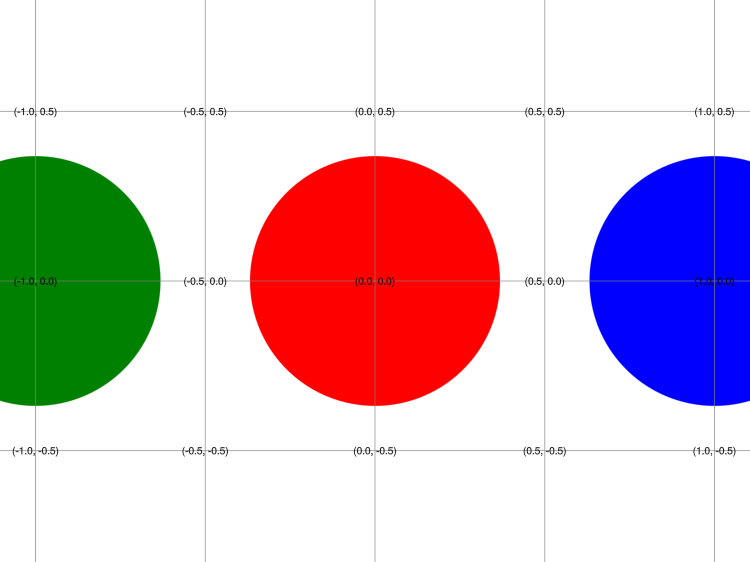

GLMakie.Screen(...)

In [79]:
update_cam!(s1, camc, Vec3f(0,0,2), Vec3f(0,0,0), Vec3f(0,1,0)) # eyeposition, lookat and upvector
display(s1)

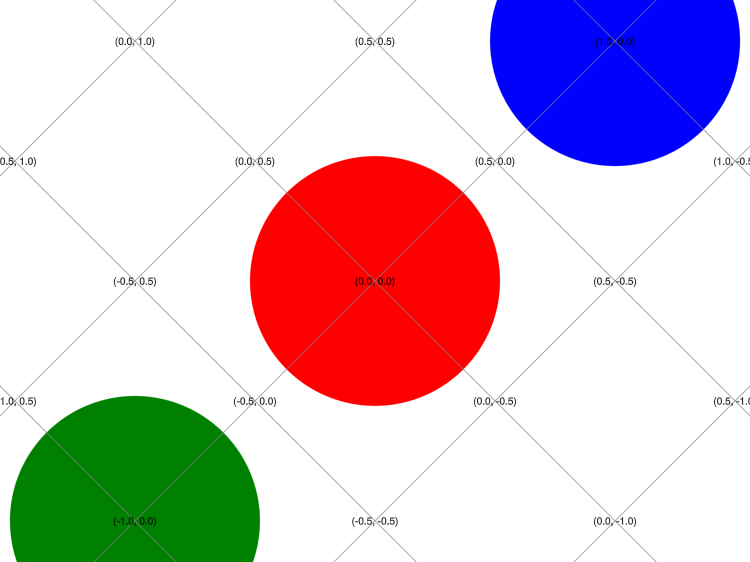

GLMakie.Screen(...)

In [80]:
update_cam!(s1, camc, Vec3f(0,0,2), Vec3f(0,0,0), Vec3f(1,1,0)) # eyeposition, lookat and upvector
display(s1)

If this is counterintuitive to you, its all right, just remember, the scene is not what the upvector controls. It is the camera. 

If you take a photo of something upright while you bend to the right, the image when seen upright, would have the thing appear bent to the left.

You would notice though that the assignment only makes sense if upvector is perpendicular to the line joining eyeposition and lookat, which would make sense.

So your upvector must lie in a plane uniquely defined by the eyeposition and lookat, whose difference vector acts as a normal vector to the plane

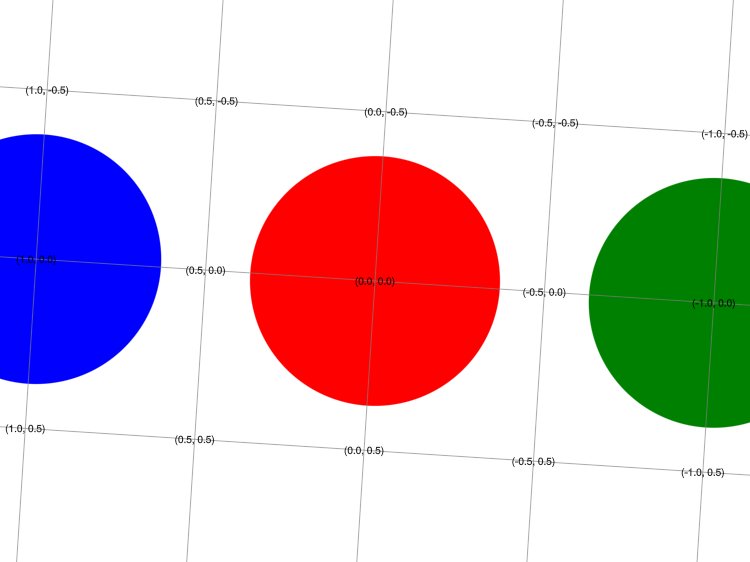

Eyeposition: Float32[0.0, 0.0, 2.0]
Lookat: Float32[0.0, 0.0, 0.0]
Upvector: Float32[0.06447778, -0.9979192, 0.0]


GLMakie.Screen(...)

In [87]:
# Randomly selecting an upvector for given eyeposition and lookat


eyeposition = Vec3f(0,0,2)
lookat = Vec3f(0,0,0)

normal_vector = lookat - eyeposition

random_vector = rand(Vec3f) # Probablistically, there is 0 change that the random vector would be parallel to the normal vector

using LinearAlgebra: normalize, cross

upvector = normalize(cross(normal_vector, random_vector)) # This will give you a vector that is perpendicular to the normal vector

update_cam!(s1, camc, eyeposition, lookat, upvector) # eyeposition, lookat and upvector

println("Eyeposition: ", eyeposition)
println("Lookat: ", lookat)
println("Upvector: ", upvector)
display(s1)

The camera position and orientation can also be adjusted via the functions

`translate_cam!(scene, v)` will translate the camera by the given vector `v`.

`rotate_cam!(scene, angles)` will rotate the camera around its axes with the corresponding angles. The first angle will rotate around the cameras "right" that is the screens horizontal axis, the second around the up vector/vertical axis or `Vec3d(0, 0, +-1)` if `fixed_axis = true`, and the third will rotate around the view direction i.e. the axis out of the screen. The rotation respects the current `rotation_center` of the camera.

`zoom!(scene, zoom_step)` will change the zoom level of the scene without translating or rotating the scene. `zoom_step` applies multiplicatively to `cam.zoom_mult` which is used as a multiplier to the fov (perspective projection) or width and height (orthographic projection).

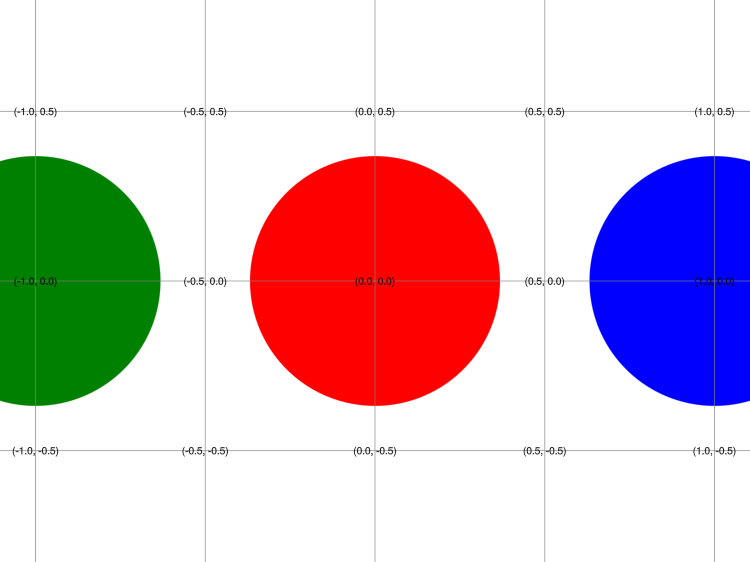

GLMakie.Screen(...)

In [123]:
update_cam!(s1, camc, eyeposition, lookat, Vec3f(0,1,0)) # eyeposition, lookat and upvector
display(s1)

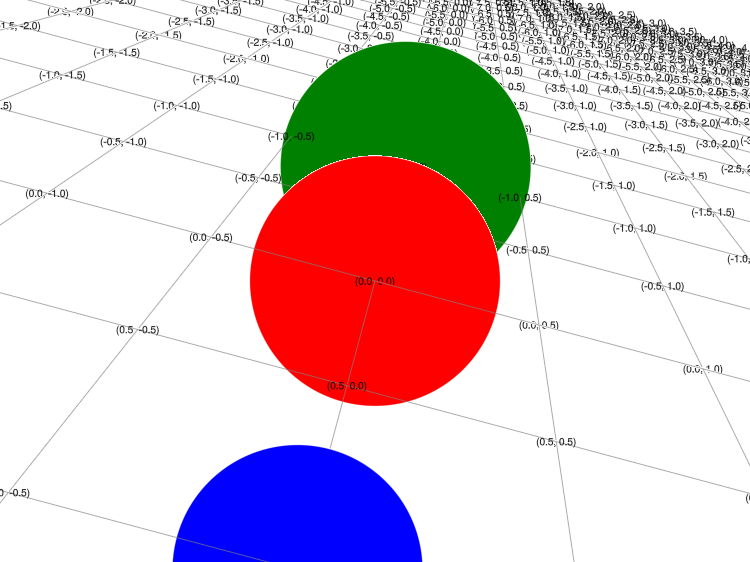

GLMakie.Screen(...)

In [124]:
using GLMakie: rotate_cam!
# Essentially, these are the intrinsic euler angles of the camera.
# The rotation applied would be in order of x, y and z axis (or rather, around the x, y and z axis), 


# Rotation Center
camc.settings.rotation_center[] = :eyeposition # default is :lookat 
# :lookat preserves the lookat point and rotates the camera around it, but :eyeposition rotates the camera around the eyeposition, preserving the eyeposition instead. Upto you what to preserve.
camc.settings.rotation_center[] = :lookat # default is :lookat


update_cam!(s1)


#---
rotate_cam!(s1, camc, Vec3f(pi/3, 0, 0)) # pi/3 radians around the x axis
rotate_cam!(s1, camc, Vec3f(0, pi/2, 0)) # pi/2 radians around the new y axis
rotate_cam!(s1, camc, Vec3f(0, 0, pi/12)) # pi/12 radians around the new z axis
display(s1)

# Again, remember, you are rotating the camera, not the scene. So if you rotate the camera towards the negative direction, you would see further in the positive direction

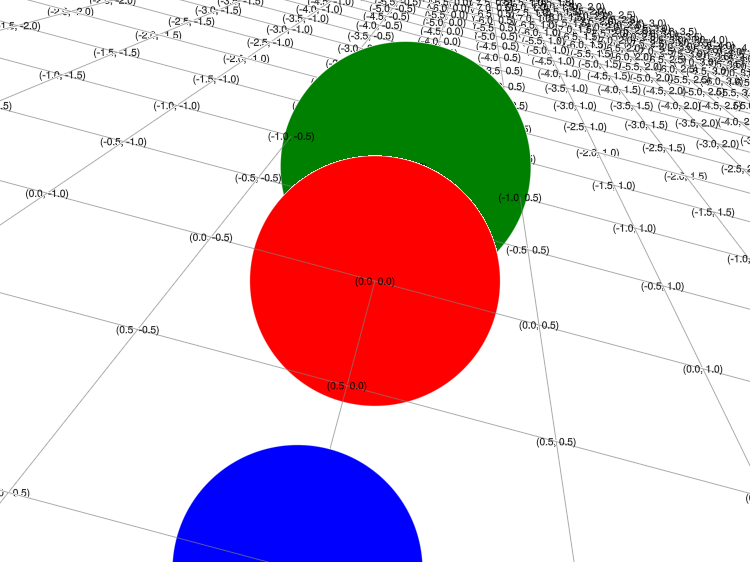

GLMakie.Screen(...)

In [125]:
#Reset the camera to original position
update_cam!(s1, camc, eyeposition, lookat, Vec3f(0,1,0)) # eyeposition, lookat and upvector

rotate_cam!(s1, camc, Vec3f(pi/3, pi/2, pi/12)) # rotates around first x axis, then y axis and then z axis (we don't know yet whether the axes are the initial axes of the camera or the new axes after each step of the rotation)
display(s1)

Since the code produces the same things when calling 
```julia
rotate_cam!(s1, camc, Vec3f(pi/4, pi/4, pi/4)) # pi/4 radians around first x axis, then y axis and then z axis
```

and

```julia
rotate_cam!(s1, camc, Vec3f(pi/4, 0, 0)) # pi/4 radians around the x axis
rotate_cam!(s1, camc, Vec3f(0, pi/4, 0)) # pi/4 radians around the new y axis
rotate_cam!(s1, camc, Vec3f(0, 0, pi/4)) # pi/4 radians around the new z axis
```

We thus know rotate_cam! would produce Rotations with **Intrinsic Euler (XY'Z'')** for the angles (x,y,z given)
(aka Body Fixed XYZ)

In [81]:
Makie.inline!(false) # This will stop making the plot inline

# Btw, I just wanted to show how to plot things in line...
# Interestingly, since I already had a Makie canvas window open, it plotted things inline, as well as updated the canvas


false

Instead of transforming the Camera, you can also transform the scene itself while keeping the camera where it is...

In [ ]:
s1.transformation

In [ ]:
using GLMakie: translate!
# Translate the scene by (1, 1)
translate!(s1, (1, 1))
text!(s1, (-1, -1), text="(-1,-1) in transformed scene", color=:black, fontsize=12, align=(:center, :center))
s1.transformation
#https://docs.makie.org/v0.22/reference/generic/transformations heres more on this

This would translate the camera to be looking at $[1,1,0]$

Similarly, you could rotate the scene:

In [ ]:
using GLMakie: rotate!, qrotation, Vec3f

# Equivalent Approach of using Quaternions
# qr = qrotation(Vec3f(0, 0, 1), pi / 4)
# rotate!(s1, qr) # Rotate the scene by 45 degrees (π/4 radians)

rotate!(s1, pi / 2) # Alternatively, you can use radians directly (Internally uses Quaternions)
# rotate!(s1, 0)
# text!(s1, (-1, -1), text="Rotated Scene (-1, -1)", color=:black, fontsize=12, align=(:center, :center))


0.7071067811865476 + 0.0im + 0.0jm + 0.7071067811865475km

---

One thing that you might have notices is that the text and the Dots do not actually rotate!
They are always upright!

In fact, their scales don't change either!

This is where you need to talk about Spaces...

## Marker, Object and Scene Spaces

In [1]:
using GLMakie: Scene, scatter!, Circle, display, text!

s1 = Scene()
scatter!(s1, (0, 0), marker = Circle, markersize = 200, color = :red)
scatter!(s1, (1, 0), marker = Circle, markersize = 200, color = :blue)
scatter!(s1, (-1, 0), marker = Circle, markersize = 200, color = :green)

display(s1)

GLMakie.Screen(...)

In [2]:
# Creating a standard number plane for visualization
using GLMakie: lines!, text!

# Draw a line at each  0.5 units in the x and y direction and at each point on the line intersection, write a text with the coordinate of point with respect to the origin, the default x and y range is (-10, 10) for both axes

function draw_number_plane(scene; x_range=[-10, 10], y_range=[-10, 10], step=0.5)
    for x in x_range[1]:step:x_range[2]
        lines!(scene, [x, x], y_range, color=:gray, linewidth=0.5) # vertical lines
    end
    for y in y_range[1]:step:y_range[2]
        lines!(scene, x_range, [y, y], color=:gray, linewidth=0.5) # horizontal lines
    end

    # Write the text for each intersection 
    for x in x_range[1]:step:x_range[2]
        for y in y_range[1]:step:y_range[2]
            text!(scene, (x, y), text="($x, $y)", color=:black, fontsize=8, align=(:center, :center))
        end
    end
end

draw_number_plane(s1, x_range=[-10, 10], y_range=[-10, 10], step=0.5)

In [8]:
using GLMakie: cam3d!, cameracontrols, update_cam!, Vec3f, Point3f, rotate_cam!, Point2f, scatter!, text!, Circle

In [28]:
cam3d!(s1);
camc = cameracontrols(s1);
update_cam!(s1, camc, Vec3f(0,0,2), Vec3f(0,0,0), Vec3f(0,1,0)); # eyeposition, lookat and upvector

In [ ]:
scatter!(s1, Point2f(0, 1), markerspace = :data, markersize = 2, marker = Circle)

MakieCore.Scatter{Tuple{Vector{GeometryBasics.Point{2, Float32}}}}

In [29]:
text!(s1, Point3f(0, 0, 0), text="Something", color=:black, fontsize=1, align=(:center, :center), markerspace=:data, space=:data)

MakieCore.Text{Tuple{Vector{Point{3, Float32}}}}

In [30]:
text!(s1, Point3f(0, 1, 10), text="Something", color=:black, fontsize=100, align=(:center, :center))

MakieCore.Text{Tuple{Vector{Point{3, Float32}}}}

In [45]:
delete!(s1, s1[end]) # This will delete the first element of the scene

In [20]:
scatter!(s1, Point3f(0, 1, 1), markerspace = :data, markersize = 2, marker = Circle, space=:data)

MakieCore.Scatter{Tuple{Vector{GeometryBasics.Point{3, Float32}}}}

In [27]:
s1 = Scene()

In [39]:
using GLMakie: Makie
Makie.Plane(Point3f(0, 0, 0), Vec3f(0, 0, 1))

Makie.Plane3f(Float32[0.0, 0.0, 1.0], 0.0f0)

In [46]:
scatter!(s1, Point2f(0, 1), markerspace = :data, markersize = 2, space=:data, clip_planes=[Makie.Plane(Point3f(0, 0, 0), Vec3f(0, 0, 1))])

MakieCore.Scatter{Tuple{Vector{Point{2, Float32}}}}

---

In [49]:
using GLMakie
using GeometryBasics

# Function to create a 2D circle (disk) mesh in the XY plane
function create_circle_mesh(radius::Float64, n_segments::Int=32)
    # Parametric equations for the circle's perimeter
    θ = range(0, 2π, length=n_segments+1)[1:end-1]  # Exclude last point to avoid overlap
    perimeter = [Point3f(radius * cos(t), radius * sin(t), 0) for t in θ]
    
    # Center of the circle
    center = Point3f(0, 0, 0)
    
    # Vertices: center + perimeter
    vertices = [center; perimeter]
    
    # Triangulate to create faces (filled disk)
    faces = TriangleFace{Int}[]
    for i in 1:(n_segments-1)
        push!(faces, (1, i+1, i+2))
    end
    push!(faces, (1, n_segments, 2))  # Close the loop
    
    # Create a GeometryBasics Mesh
    return Mesh(vertices, faces)
end

# Create a GLMakie scene
scene = Scene()

# Define circle properties
radius = 1.0  # Radius in world coordinates
circle_mesh = create_circle_mesh(radius)

# Plot the circle using mesh!
mesh!(scene, circle_mesh, color=:blue, shading=false)

# Translate the circle to a specific position (optional)
# For example, move to (2, 3, 0):
# translate!(scene[end], Vec3f(2, 3, 0))

# Display the scene
display(scene)

MethodError: MethodError: no method matching Mesh(::Vector{Any}, ::Vector{TriangleFace{Int64}})

Closest candidates are:
  Mesh(!Matched::AbstractArray{Point{Dim, T}, 1}, ::AbstractVector{<:AbstractFace}; views, kwargs...) where {Dim, T}
   @ GeometryBasics C:\Users\DELL\.julia\packages\GeometryBasics\79wKA\src\basic_types.jl:702
  Mesh(!Matched::NamedTuple{Names, VAT}, ::FVT, !Matched::Vector{<:UnitRange{<:Integer}}) where {FT<:AbstractFace, FVT<:AbstractVector{FT}, Names, Dim, T, VAT<:(Tuple{var"#s8", Vararg{Union{AbstractVector{T}, FaceView{T, AVT} where AVT<:AbstractVector{T}} where T}} where var"#s8"<:AbstractArray{Point{Dim, T}, 1})}
   @ GeometryBasics C:\Users\DELL\.julia\packages\GeometryBasics\79wKA\src\basic_types.jl:523
  Mesh(!Matched::NamedTuple{Names, VAT}, ::FVT) where {FT<:AbstractFace, FVT<:AbstractVector{FT}, Names, Dim, T, VAT<:(Tuple{var"#s9", Vararg{Union{AbstractVector{T}, FaceView{T, AVT} where AVT<:AbstractVector{T}} where T}} where var"#s9"<:AbstractArray{Point{Dim, T}, 1})}
   @ GeometryBasics C:\Users\DELL\.julia\packages\GeometryBasics\79wKA\src\basic_types.jl:523


MethodError: MethodError: no method matching Mesh(::Vector{Any}, ::Vector{TriangleFace{Int64}})

Closest candidates are:
  Mesh(!Matched::AbstractArray{Point{Dim, T}, 1}, ::AbstractVector{<:AbstractFace}; views, kwargs...) where {Dim, T}
   @ GeometryBasics C:\Users\DELL\.julia\packages\GeometryBasics\79wKA\src\basic_types.jl:702
  Mesh(!Matched::NamedTuple{Names, VAT}, ::FVT, !Matched::Vector{<:UnitRange{<:Integer}}) where {FT<:AbstractFace, FVT<:AbstractVector{FT}, Names, Dim, T, VAT<:(Tuple{var"#s8", Vararg{Union{AbstractVector{T}, FaceView{T, AVT} where AVT<:AbstractVector{T}} where T}} where var"#s8"<:AbstractArray{Point{Dim, T}, 1})}
   @ GeometryBasics C:\Users\DELL\.julia\packages\GeometryBasics\79wKA\src\basic_types.jl:523
  Mesh(!Matched::NamedTuple{Names, VAT}, ::FVT) where {FT<:AbstractFace, FVT<:AbstractVector{FT}, Names, Dim, T, VAT<:(Tuple{var"#s9", Vararg{Union{AbstractVector{T}, FaceView{T, AVT} where AVT<:AbstractVector{T}} where T}} where var"#s9"<:AbstractArray{Point{Dim, T}, 1})}
   @ GeometryBasics C:\Users\DELL\.julia\packages\GeometryBasics\79wKA\src\basic_types.jl:523


In [59]:
circle = GeometryBasics.Circle(Point2f(0, 0), 1.0)
faces = decompose(TriangleFace{Int}, circle)
pos = decompose(Point{2, Float64}, circle)


64-element Vector{Point{2, Float64}}:
 [1.0, 0.0]
 [0.9950307753654014, 0.09956784659581665]
 [0.9801724878485438, 0.19814614319939755]
 [0.9555728057861408, 0.29475517441090415]
 [0.9214762118704076, 0.3884347962746947]
 [0.8782215733702285, 0.4782539786213182]
 [0.8262387743159949, 0.563320058063622]
 [0.766044443118978, 0.6427876096865393]
 [0.6982368180860729, 0.7158668492597184]
 [0.6234898018587336, 0.7818314824680298]
 ⋮
 [0.698236818086073, -0.7158668492597183]
 [0.7660444431189778, -0.6427876096865396]
 [0.8262387743159949, -0.563320058063622]
 [0.8782215733702283, -0.4782539786213186]
 [0.9214762118704076, -0.38843479627469474]
 [0.9555728057861406, -0.2947551744109047]
 [0.9801724878485438, -0.19814614319939772]
 [0.9950307753654013, -0.09956784659581729]
 [1.0, -2.4492935982947064e-16]

In [91]:
mesh  = Mesh(pos, faces)

Mesh{2, Float64, TriangleFace{Int64}}
    faces: 122
    vertex position: 128


In [92]:
# Plot the mesh
using GLMakie: Scene, mesh!, display
scene = Scene(camera=cam3d!, size=(800, 600), backgroundcolor=:white)
# mesh!(scene, mesh, color=:blue, shading=false)
# display(scene)

In [93]:
colors = [:red, :green, :blue, :orange]
mesh!(scene, mesh, color=rand(colors, length(pos)), space=:data, shading=NoShading)

MakieCore.Mesh{Tuple{Mesh{2, Float64, NgonFace{3, OffsetInteger{-1, UInt32}}, (:position,), Tuple{Vector{Point{2, Float64}}}, Vector{NgonFace{3, OffsetInteger{-1, UInt32}}}}}}

In [97]:
circle_up = GeometryBasics.Circle(Point2f(0, 1), 1.0)
faces = decompose(TriangleFace{Int}, circle)
pos = decompose(Point{2, Float64}, circle)
circle_down = GeometryBasics.Circle(Point2f(0, -1), 1.0)
push!(faces, decompose(TriangleFace{Int}, circle_down)...)
push!(pos, decompose(Point{2, Float64}, circle_down)...)

128-element Vector{Point{2, Float64}}:
 [1.0, 1.0]
 [0.9950307753654014, 1.0995678465958167]
 [0.9801724878485438, 1.1981461431993976]
 [0.9555728057861408, 1.2947551744109043]
 [0.9214762118704076, 1.3884347962746948]
 [0.8782215733702285, 1.4782539786213182]
 [0.8262387743159949, 1.563320058063622]
 [0.766044443118978, 1.6427876096865393]
 [0.6982368180860729, 1.7158668492597184]
 [0.6234898018587336, 1.78183148246803]
 ⋮
 [0.698236818086073, -1.7158668492597182]
 [0.7660444431189778, -1.6427876096865397]
 [0.8262387743159949, -1.563320058063622]
 [0.8782215733702283, -1.4782539786213187]
 [0.9214762118704076, -1.3884347962746948]
 [0.9555728057861406, -1.2947551744109047]
 [0.9801724878485438, -1.1981461431993976]
 [0.9950307753654013, -1.0995678465958172]
 [1.0, -1.0000000000000002]

In [107]:
using GLMakie
using GeometryBasics

# Function to create a 2D circle (disk) mesh in the XY plane
function create_circle_mesh(radius::Float64, n_segments::Int=32)
    # Parametric equations for the circle's perimeter
    θ = range(0, 2π, length=n_segments+1)[1:end-1]  # Exclude last point to avoid overlap
    perimeter = [Point3f(radius * cos(t), radius * sin(t), 0) for t in θ]
    
    # Center of the circle
    center = Point3f(0, 0, 0)
    
    # Vertices: center + perimeter
    vertices = [center, perimeter...]  # Combine center and perimeter points
    
    # Triangulate to create faces (filled disk)
    faces = TriangleFace{Int}[]
    for i in 1:(n_segments-1)
        push!(faces, TriangleFace(1, i+1, i+2))
    end
    # Corrected last face: connect center (1), last perimeter vertex (n_segments+1), first perimeter vertex (2)
    push!(faces, TriangleFace(1, n_segments+1, 2))
    
    # Create a GeometryBasics Mesh
    return Mesh(vertices, faces)
end

# Create a GLMakie scene
s = Scene(camera=cam3d!, size=(800, 600), backgroundcolor=:white)

# Define circle properties
radius = 1.0  # Radius in world coordinates
circle_mesh = create_circle_mesh(radius, 100)

# Plot the circle using mesh!
mesh!(s, circle_mesh, color=:blue, shading=false)

# Optional: Translate or rotate the circle
# translate!(s[end], Vec3f(2, 0, 0))  # Move to x=2
# rotate!(s[end], Vec3f(1, 0, 0), deg2rad(45))  # Rotate 45° around x-axis

# Display the scene
display(s)

┌ Warning: `shading = false` is not valid. Use `Makie.automatic`, `NoShading`, `FastShading` or `MultiLightShading`. Defaulting to `NoShading`.
└ @ Makie C:\Users\DELL\.julia\packages\Makie\ux0Te\src\lighting.jl:243


GLMakie.Screen(...)

In [112]:
using GLMakie
using GeometryBasics

# Function to create a 3D cylinder mesh (axis along Z, centered at origin)
function create_cylinder_mesh(radius::Float64, height::Float64, n_segments::Int=32)
    # Parametric angles for the circular bases
    θ = range(0, 2π, length=n_segments+1)[1:end-1]  # Exclude last point to avoid overlap
    
    # Vertices for top and bottom circles
    top_center = Point3f(0, 0, height/2)
    bottom_center = Point3f(0, 0, -height/2)
    top_perimeter = [Point3f(radius * cos(t), radius * sin(t), height/2) for t in θ]
    bottom_perimeter = [Point3f(radius * cos(t), radius * sin(t), -height/2) for t in θ]
    
    # Combine vertices using [center, perimeter...] style
    vertices = [top_center, top_perimeter..., bottom_center, bottom_perimeter...]
    
    # Triangulate faces
    faces = TriangleFace{Int}[]
    
    # Top disk (center at index 1, perimeter at 2 to n_segments+1)
    for i in 1:(n_segments-1)
        push!(faces, TriangleFace(1, i+1, i+2))
    end
    push!(faces, TriangleFace(1, n_segments+1, 2))
    
    # Bottom disk (center at n_segments+2, perimeter at n_segments+3 to 2*n_segments+2, reverse orientation for normals)
    bottom_center_idx = n_segments + 2
    bottom_perimeter_start = n_segments + 3
    for i in 1:(n_segments-1)
        push!(faces, TriangleFace(bottom_center_idx, bottom_perimeter_start+i-1, bottom_perimeter_start+i))
    end
    push!(faces, TriangleFace(bottom_center_idx, bottom_perimeter_start+n_segments-1, bottom_perimeter_start))
    
    # Lateral surface (connect top and bottom perimeters with quads split into triangles)
    top_perimeter_start = 2
    for i in 1:(n_segments-1)
        # Quad: (top[i], top[i+1], bottom[i], bottom[i+1])
        top_i = top_perimeter_start + i - 1
        top_ip1 = top_perimeter_start + i
        bottom_i = bottom_perimeter_start + i - 1
        bottom_ip1 = bottom_perimeter_start + i
        # Split quad into two triangles
        push!(faces, TriangleFace(top_i, top_ip1, bottom_i))
        push!(faces, TriangleFace(top_ip1, bottom_ip1, bottom_i))
    end
    # Close the lateral surface
    push!(faces, TriangleFace(top_perimeter_start+n_segments-1, top_perimeter_start, bottom_perimeter_start+n_segments-1))
    push!(faces, TriangleFace(top_perimeter_start, bottom_perimeter_start, bottom_perimeter_start+n_segments-1))
    
    # Create a GeometryBasics Mesh
    return Mesh(vertices, faces)
end

# Create a GLMakie scene
s = Scene(camera=cam3d!, size=(800, 600), backgroundcolor=:white)

# Define cylinder properties
radius = 1.0  # Radius in world coordinates
height = 2.0  # Height in world coordinates
cylinder_mesh = create_cylinder_mesh(radius, height)

# Plot the cylinder using mesh! with flat shading
mesh!(s, cylinder_mesh, color=:blue, shading=FastShading)

# Optional: Translate or rotate the cylinder
# translate!(s[end], Vec3f(2, 0, 0))  # Move to x=2
# rotate!(s[end], Vec3f(1, 0, 0), deg2rad(45))  # Rotate 45° around x-axis

# Display the scene
display(s)

GLMakie.Screen(...)

ErrorException: syntax: more than one semicolon in argument list around e:\Programming\Canvas\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y220sZmlsZQ==.jl:28

In [115]:
using GLMakie
using GeometryBasics

# Adapted from _circle in Makie docs
function create_circle_disk(origin::Point3f, r::Float32, normal::Vec3f, N::Int)
    dphi = 2pi / N
    coords = Vector{Point3f}(undef, N+1)
    normals = fill(normal, N+1)
    faces = Vector{GLTriangleFace}(undef, N)
    
    for (i, phi) in enumerate(0:dphi:2pi-0.5dphi)
        coords[i] = origin .+ r * Vec3f(cos(phi), sin(phi), 0)
        faces[i] = GLTriangleFace(N+1, mod1(i+1, N), i)
    end
    coords[N+1] = origin
    
    return GeometryBasics.mesh(coords, faces; normal=normals)
end

# Adapted from _mantle in Makie docs, but for a cylinder (r1 = r2)
function create_cylinder_mantle(origin::Point3f, extremity::Point3f, r::Float32, N::Int)
    dphi = 2pi / N
    # For a cylinder, r1 = r2, so the normals are purely radial (no z component)
    xy = 1.0  # Since r2-r1 = 0, temp = 0, so xy = 1/sqrt(0^2+1) = 1
    z = 0.0   # z = temp/sqrt(temp^2+1) = 0
    
    coords = Vector{Point3f}(undef, 2N)
    normals = Vector{Vec3f}(undef, 2N)
    faces = Vector{GLTriangleFace}(undef, 2N)
    
    for (i, phi) in enumerate(0:dphi:2pi-0.5dphi)
        coords[2i - 1] = origin .+ r * Vec3f(cos(phi), sin(phi), 0)
        coords[2i] = extremity .+ r * Vec3f(cos(phi), sin(phi), 0)
        normals[2i - 1] = Vec3f(xy*cos(phi), xy*sin(phi), z)
        normals[2i] = Vec3f(xy*cos(phi), xy*sin(phi), z)
        faces[2i - 1] = GLTriangleFace(2i-1, mod1(2i+1, 2N), 2i)
        faces[2i] = GLTriangleFace(mod1(2i+1, 2N), mod1(2i+2, 2N), 2i)
    end
    
    return GeometryBasics.mesh(coords, faces; normal=normals)
end

# Create a cylinder mesh by combining top/bottom disks and mantle
function create_cylinder_mesh(radius::Float64, height::Float64, n_segments::Int=32)
    # Convert to Float32 for consistency with Makie docs
    r = Float32(radius)
    h = Float32(height)
    
    # Define top and bottom centers
    top_center = Point3f(0, 0, h/2)
    bottom_center = Point3f(0, 0, -h/2)
    
    # Create top and bottom disks
    top_disk = create_circle_disk(top_center, r, Vec3f(0, 0, 1), n_segments)
    bottom_disk = create_circle_disk(bottom_center, r, Vec3f(0, 0, -1), n_segments)
    
    # Create the lateral surface (mantle)
    mantle = create_cylinder_mantle(bottom_center, top_center, r, n_segments)
    
    # Merge the meshes
    return merge([top_disk, bottom_disk, mantle])
end

# Create a GLMakie scene
s = Scene(camera=cam3d!, size=(800, 600), backgroundcolor=:white)

# Define cylinder properties
radius = 1.0  # Radius in world coordinates
height = 2.0  # Height in world coordinates
cylinder_mesh = create_cylinder_mesh(radius, height)

# Plot the cylinder using mesh! with flat shading
mesh!(s, cylinder_mesh, color=:blue, shading=FastShading)

# Optional: Translate or rotate the cylinder
# translate!(s[end], Vec3f(2, 0, 0))  # Move to x=2
# rotate!(s[end], Vec3f(1, 0, 0), deg2rad(45))  # Rotate 45° around x-axis

# Display the scene
display(s)

GLMakie.Screen(...)

In [121]:
using GLMakie
using GeometryBasics

# Function to create a 3D arrow mesh (oriented along Z-axis, arrowhead at positive Z)
function create_arrow_mesh(shaft_length::Float64, shaft_radius::Float64, head_length::Float64, head_base_radius::Float64, head_tip_radius::Float64, n_segments::Int=16)
    # Convert to Float32 for consistency with Makie docs
    sl = Float32(shaft_length)
    sr = Float32(shaft_radius)
    hl = Float32(head_length)
    hbr = Float32(head_base_radius)
    htr = Float32(head_tip_radius)
    
    # Parametric angles for circular cross-sections
    θ = range(0, 2pi, length=n_segments+1)[1:end-1]  # Exclude last point to avoid overlap
    
    # Shaft vertices (cylinder from z=0 to z=shaft_length)
    shaft_start = Point3f(0, 0, 0)
    shaft_end = Point3f(0, 0, sl)
    shaft_perimeter_start = [Point3f(sr * cos(t), sr * sin(t), 0) for t in θ]
    shaft_perimeter_end = [Point3f(sr * cos(t), sr * sin(t), sl) for t in θ]
    
    # Arrowhead vertices (conical section from z=shaft_length to z=shaft_length+head_length)
    head_base = Point3f(0, 0, sl)
    head_tip = Point3f(0, 0, sl + hl)
    head_perimeter_base = [Point3f(hbr * cos(t), hbr * sin(t), sl) for t in θ]
    head_perimeter_tip = [Point3f(htr * cos(t), htr * sin(t), sl + hl) for t in θ]
    
    # Combine vertices using interleaved approach (like _mantle)
    coords = Vector{Point3f}(undef, 2 * n_segments * 2)  # Shaft start/end + head base/tip
    normals = Vector{Vec3f}(undef, 2 * n_segments * 2)
    
    # Shaft vertices and normals (interleaved start and end perimeters)
    for (i, phi) in enumerate(θ)
        idx = 2 * (i - 1) + 1
        coords[idx] = shaft_start + shaft_perimeter_start[i]
        coords[idx + 1] = shaft_end + shaft_perimeter_end[i]
        # Normals for cylinder (radial, z=0)
        normals[idx] = Vec3f(cos(phi), sin(phi), 0)
        normals[idx + 1] = Vec3f(cos(phi), sin(phi), 0)
    end
    
    # Arrowhead vertices and normals (interleaved base and tip perimeters)
    head_start_idx = 2 * n_segments
    for (i, phi) in enumerate(θ)
        idx = head_start_idx + 2 * (i - 1) + 1
        coords[idx] = head_base + head_perimeter_base[i]
        coords[idx + 1] = head_tip + head_perimeter_tip[i]
        # Normals for cone (radial, adjusted for taper)
        temp = -(htr - hbr) / hl
        xy = 1.0 / sqrt(temp^2 + 1)
        z = temp / sqrt(temp^2 + 1)
        normals[idx] = Vec3f(xy * cos(phi), xy * sin(phi), z)
        normals[idx + 1] = Vec3f(xy * cos(phi), xy * sin(phi), z)
    end
    
    # Faces for shaft (lateral surface)
    faces = Vector{GLTriangleFace}(undef, 2 * n_segments)
    for i in 1:(n_segments-1)
        faces[2 * (i - 1) + 1] = GLTriangleFace(2 * i - 1, 2 * i + 1, 2 * i)
        faces[2 * (i - 1) + 2] = GLTriangleFace(2 * i + 1, 2 * i + 2, 2 * i)
    end
    # Close the shaft
    faces[2 * n_segments - 1] = GLTriangleFace(2 * n_segments - 1, 1, 2 * n_segments)
    faces[2 * n_segments] = GLTriangleFace(1, 2, 2 * n_segments)
    
    # Faces for arrowhead (lateral surface)
    for i in 1:(n_segments-1)
        idx = 2 * (i - 1)
        base_idx = head_start_idx + idx + 1
        push!(faces, GLTriangleFace(base_idx, base_idx + 2, base_idx + 1))
        push!(faces, GLTriangleFace(base_idx + 2, base_idx + 3, base_idx + 1))
    end
    # Close the arrowhead
    idx = 2 * (n_segments - 1)
    base_idx = head_start_idx + idx + 1
    push!(faces, GLTriangleFace(base_idx, head_start_idx + 1, base_idx + 1))
    push!(faces, GLTriangleFace(head_start_idx + 1, head_start_idx + 2, base_idx + 1))
    
    # Create the mesh
    return GeometryBasics.mesh(coords, faces; normal=normals)
end

# Create a GLMakie scene
s = Scene(camera=cam3d!, size=(800, 600), backgroundcolor=:white)

# Define arrow properties
shaft_length = 2.0  # Length of the shaft
shaft_radius = 0.1  # Radius of the shaft
head_length = 0.5   # Length of the arrowhead
head_base_radius = 0.25  # Radius at the base of the arrowhead
head_tip_radius = 0.01  # Radius at the tip of the arrowhead
arrow_mesh = create_arrow_mesh(shaft_length, shaft_radius, head_length, head_base_radius, head_tip_radius)

# Plot the arrow using mesh! with FastShading
mesh!(s, arrow_mesh, color=:red, shading=FastShading)

# Optional: Translate or rotate the arrow
# translate!(s[end], Vec3f(0, 0, 0))  # Move to desired position
# rotate!(s[end], Vec3f(0, 1, 0), deg2rad(90))  # Rotate 90° around Y-axis to point along X-axis

# Add a wireframe to make edges visible (optional)
# wireframe!(s, arrow_mesh, color=:black, linewidth=1.0)

# Display the scene
display(s)

GLMakie.Screen(...)

In [183]:
s = Scene(camera=cam3d!, size=(800, 600), backgroundcolor=:white)


In [184]:
meshscatter!(s, [Point3f(i,j,k) for i in -5:5 for j in -5:5 for k in -5:5], marker=:Sphere, space=:data) # markersize=0.1 default marker size.

MeshScatter{Tuple{Vector{Point{3, Float32}}}}

In [185]:
meshscatter!(s, (0,0,0), color=:red, marker=:Sphere, space=:data, markersize=0.3)

MeshScatter{Tuple{Vector{Point{3, Float64}}}}

In [224]:
# Define arrow properties
size_factor = 1
shaft_length = 2.0*size_factor  # Length of the shaft
shaft_radius = 0.1*size_factor  # Radius of the shaft
head_length = 0.5*size_factor   # Length of the arrowhead
head_base_radius = 0.25*size_factor  # Radius at the base of the arrowhead
head_tip_radius = 0.01*size_factor  # Radius at the tip of the arrowhead
arrow_mesh = create_arrow_mesh(shaft_length, shaft_radius, head_length, head_base_radius, head_tip_radius)
meshscatter!(s, (0,0,0), marker=arrow_mesh, color=:red, shading=FastShading, space=:data, markersize=1)

MeshScatter{Tuple{Vector{Point{3, Float64}}}}

In [159]:
mesh!(s, arrow_mesh, color=:blue, shading=FastShading, space=:data)

MakieCore.Mesh{Tuple{Mesh{3, Float32, NgonFace{3, OffsetInteger{-1, UInt32}}, (:position, :normal), Tuple{Vector{Point{3, Float32}}, Vector{Vec{3, Float32}}}, Vector{NgonFace{3, OffsetInteger{-1, UInt32}}}}}}

In [140]:
center!(s)

In [187]:
meshscatter!(s, (0,0,0), marker=:Sphere, color=:red, space=:data, markersize=1)

MeshScatter{Tuple{Vector{Point{3, Float64}}}}

In [188]:
sphere = GeometryBasics.Sphere(Point3f(0, 0, 0), 1.0)
meshscatter!(s, (0,0,0), marker=sphere, color=:green, shading=FastShading, space=:data, markersize=1)

MeshScatter{Tuple{Vector{Point{3, Float64}}}}

In [225]:
fieldnames(typeof(arrow_mesh))
arrow_mesh.vertex_attributes[1]

64-element Vector{Point{3, Float32}}:
 [0.1, 0.0, 0.0]
 [0.1, 0.0, 4.0]
 [0.09238795, 0.038268343, 0.0]
 [0.09238795, 0.038268343, 4.0]
 [0.07071068, 0.07071068, 0.0]
 [0.07071068, 0.07071068, 4.0]
 [0.038268343, 0.09238795, 0.0]
 [0.038268343, 0.09238795, 4.0]
 [6.1232343f-18, 0.1, 0.0]
 [6.1232343f-18, 0.1, 4.0]
 ⋮
 [-0.0038268343, -0.009238795, 5.0]
 [-4.5924254f-17, -0.25, 4.0]
 [-1.8369702f-18, -0.01, 5.0]
 [0.09567086, -0.23096988, 4.0]
 [0.0038268343, -0.009238795, 5.0]
 [0.17677669, -0.17677669, 4.0]
 [0.0070710676, -0.0070710676, 5.0]
 [0.23096988, -0.09567086, 4.0]
 [0.009238795, -0.0038268343, 5.0]

From what I understand, `meshscatter!`, with `space=:data`, takes in a mesh and plots it onto the 3D scene the following way:

- (0,0,0) of the Mesh Space corresponds

In [223]:
s=Scene(camera=cam3d!, size=(800, 600), backgroundcolor=:white)
meshscatter!(s, (0,0,0), marker=arrow_mesh, color=:red, shading=FastShading, space=:data, markersize=1)
tail = (0,0,0)
head = shaft_length + head_length
meshscatter!(s, tail./size_factor, space=:data, markersize=0.2, color=:blue, marker=sphere_mesh)
meshscatter!(s, (0,0,head./size_factor), space=:data, markersize=0.25, color=:blue, marker=:Sphere)
meshscatter!(s, (0,0,0), marker=circle_mesh, color=:blue, shading=FastShading, space=:data, markersize=1)
display(s)


GLMakie.Screen(...)

In [212]:
# Function to create a 2D circle (disk) mesh in the XY plane
function create_circle_mesh(radius::Float64, n_segments::Int=32)
    # Parametric equations for the circle's perimeter
    θ = range(0, 2π, length=n_segments+1)[1:end-1]  # Exclude last point to avoid overlap
    perimeter = [Point3f(radius * cos(t), radius * sin(t), 0) for t in θ]
    
    # Center of the circle
    center = Point3f(0, 0, 0)
    
    # Vertices: center + perimeter
    vertices = [center, perimeter...]  # Combine center and perimeter points
    
    # Triangulate to create faces (filled disk)
    faces = TriangleFace{Int}[]
    for i in 1:(n_segments-1)
        push!(faces, TriangleFace(1, i+1, i+2))
    end
    # Corrected last face: connect center (1), last perimeter vertex (n_segments+1), first perimeter vertex (2)
    push!(faces, TriangleFace(1, n_segments+1, 2))
    
    # Create a GeometryBasics Mesh
    return Mesh(vertices, faces)
end

# Create a GLMakie scene
s = Scene(camera=cam3d!, size=(800, 600), backgroundcolor=:white)

# Define circle properties
radius = 1.0  # Radius in world coordinates
circle_mesh = create_circle_mesh(radius, 100)

Mesh{3, Float32, TriangleFace{Int64}}
    faces: 100
    vertex position: 101


In [217]:
# decompose sphere by GeometryBasics into vertices and faces
sphere = GeometryBasics.Sphere(Point3f(0, 0, 0), 1.0)
faces = decompose(TriangleFace{Int}, sphere)
pos = decompose(Point{3, Float64}, sphere)
sphere_mesh = Mesh(pos, faces)

Mesh{3, Float64, TriangleFace{Int64}}
    faces: 1058
    vertex position: 576


In [218]:
sphere_mesh.vertex_attributes[1]

576-element Vector{Point{3, Float64}}:
 [0.0, 0.0, 1.0]
 [0.1361666490962466, 0.0, 0.9906859460363308]
 [0.2697967711570243, 0.0, 0.9629172873477994]
 [0.39840108984624145, 0.0, 0.917211301505453]
 [0.5195839500354336, 0.0, 0.8544194045464886]
 [0.6310879443260528, 0.0, 0.7757112907044199]
 [0.730835964278124, 0.0, 0.6825531432186541]
 [0.816969893010442, 0.0, 0.5766803221148671]
 [0.8878852184023752, 0.0, 0.4600650377311522]
 [0.9422609221188205, 0.0, 0.33487961217098605]
 ⋮
 [0.8878852184023752, -2.1746915814534348e-16, -0.4600650377311521]
 [0.8169698930104421, -2.000999128949987e-16, -0.5766803221148671]
 [0.7308359642781243, -1.7900318487099486e-16, -0.6825531432186539]
 [0.6310879443260526, -1.5457196619987667e-16, -0.7757112907044199]
 [0.5195839500354335, -1.2726136425984637e-16, -0.8544194045464886]
 [0.3984010898462418, -9.758012389140342e-17, -0.9172113015054528]
 [0.2697967711570247, -6.608115044354826e-17, -0.9629172873477991]
 [0.13616664909624665, -3.335121019326786e-17,

In [227]:
using GLMakie
using GeometryBasics

# Function to create a 3D arrow mesh (oriented along Z-axis, arrowhead at positive Z)
function create_arrow_mesh(shaft_length::Float64, shaft_radius::Float64, head_length::Float64, head_base_radius::Float64, head_tip_radius::Float64, n_segments::Int=16)
    # Convert to Float32 for consistency with Makie docs
    sl = Float32(shaft_length)
    sr = Float32(shaft_radius)
    hl = Float32(head_length)
    hbr = Float32(head_base_radius)
    htr = Float32(head_tip_radius)
    
    println("sl: $sl, hl: $hl, sr: $sr, hbr: $hbr, htr: $htr")  # Debug print
    
    # Parametric angles for circular cross-sections
    θ = range(0, 2pi, length=n_segments+1)[1:end-1]  # Exclude last point to avoid overlap
    
    # Shaft vertices (cylinder from z=0 to z=shaft_length)
    shaft_start = Point3f(0, 0, 0)
    shaft_end = Point3f(0, 0, sl)
    shaft_perimeter_start = [Point3f(sr * cos(t), sr * sin(t), 0) for t in θ]
    shaft_perimeter_end = [Point3f(sr * cos(t), sr * sin(t), sl) for t in θ]
    
    # Arrowhead vertices (conical section from z=shaft_length to z=shaft_length+head_length)
    head_base = Point3f(0, 0, sl)
    head_tip = Point3f(0, 0, sl + hl)
    head_perimeter_base = [Point3f(hbr * cos(t), hbr * sin(t), sl) for t in θ]
    head_perimeter_tip = [Point3f(htr * cos(t), htr * sin(t), sl + hl) for t in θ]
    
    # Combine vertices using interleaved approach (like _mantle)
    coords = Vector{Point3f}(undef, 2 * n_segments * 2)  # Shaft start/end + head base/tip
    normals = Vector{Vec3f}(undef, 2 * n_segments * 2)
    
    # Shaft vertices and normals (interleaved start and end perimeters)
    for (i, phi) in enumerate(θ)
        idx = 2 * (i - 1) + 1
        coords[idx] = shaft_start + shaft_perimeter_start[i]
        coords[idx + 1] = shaft_end + shaft_perimeter_end[i]
        # Normals for cylinder (radial, z=0)
        normals[idx] = Vec3f(cos(phi), sin(phi), 0)
        normals[idx + 1] = Vec3f(cos(phi), sin(phi), 0)
    end
    
    # Arrowhead vertices and normals (interleaved base and tip perimeters)
    head_start_idx = 2 * n_segments
    for (i, phi) in enumerate(θ)
        idx = head_start_idx + 2 * (i - 1) + 1
        coords[idx] = head_base + head_perimeter_base[i]
        coords[idx + 1] = head_tip + head_perimeter_tip[i]
        # Normals for cone (radial, adjusted for taper)
        temp = -(htr - hbr) / hl
        xy = 1.0 / sqrt(temp^2 + 1)
        z = temp / sqrt(temp^2 + 1)
        normals[idx] = Vec3f(xy * cos(phi), xy * sin(phi), z)
        normals[idx + 1] = Vec3f(xy * cos(phi), xy * sin(phi), z)
    end
    
    # Faces for shaft (lateral surface)
    faces = Vector{GLTriangleFace}(undef, 2 * n_segments)
    for i in 1:(n_segments-1)
        faces[2 * (i - 1) + 1] = GLTriangleFace(2 * i - 1, 2 * i + 1, 2 * i)
        faces[2 * (i - 1) + 2] = GLTriangleFace(2 * i + 1, 2 * i + 2, 2 * i)
    end
    # Close the shaft
    faces[2 * n_segments - 1] = GLTriangleFace(2 * n_segments - 1, 1, 2 * n_segments)
    faces[2 * n_segments] = GLTriangleFace(1, 2, 2 * n_segments)
    
    # Faces for arrowhead (lateral surface)
    for i in 1:(n_segments-1)
        idx = 2 * (i - 1)
        base_idx = head_start_idx + idx + 1
        push!(faces, GLTriangleFace(base_idx, base_idx + 2, base_idx + 1))
        push!(faces, GLTriangleFace(base_idx + 2, base_idx + 3, base_idx + 1))
    end
    # Close the arrowhead
    idx = 2 * (n_segments - 1)
    base_idx = head_start_idx + idx + 1
    push!(faces, GLTriangleFace(base_idx, head_start_idx + 1, base_idx + 1))
    push!(faces, GLTriangleFace(head_start_idx + 1, head_start_idx + 2, base_idx + 1))
    
    # Create the mesh
    return GeometryBasics.mesh(coords, faces; normal=normals)
end

# Create a GLMakie scene
s = Scene(camera=cam3d!, size=(800, 600), backgroundcolor=:white)

# Define arrow properties
size_factor = 1
shaft_length = 2.0 * size_factor  # Length of the shaft
shaft_radius = 0.1 * size_factor  # Radius of the shaft
head_length = 0.5 * size_factor   # Length of the arrowhead
head_base_radius = 0.25 * size_factor  # Radius at the base of the arrowhead
head_tip_radius = 0.01 * size_factor  # Radius at the tip of the arrowhead

println("shaft_length: $shaft_length, head_length: $head_length")
arrow_mesh = create_arrow_mesh(shaft_length, shaft_radius, head_length, head_base_radius, head_tip_radius)

# Check vertex attributes
println("Vertex attributes:")
println(arrow_mesh.vertex_attributes[1])

meshscatter!(s, (0,0,0), marker=arrow_mesh, color=:red, shading=FastShading, space=:data, markersize=1)

# Sphere for comparison
sphere = GeometryBasics.Sphere(Point3f(0, 0, 0), 1)
meshscatter!(s, (0,0,0), marker=sphere, color=:green, shading=FastShading, space=:data, markersize=0.1)
meshscatter!(s, (0,0,shaft_length+head_length), marker=sphere, color=:blue, shading=FastShading, space=:data, markersize=0.1)

# Display the scene
display(s)

shaft_length: 2.0, head_length: 0.5
sl: 2.0, hl: 0.5, sr: 0.1, hbr: 0.25, htr: 0.01
Vertex attributes:
Point{3, Float32}[[0.1, 0.0, 0.0], [0.1, 0.0, 4.0], [0.09238795, 0.038268343, 0.0], [0.09238795, 0.038268343, 4.0], [0.07071068, 0.07071068, 0.0], [0.07071068, 0.07071068, 4.0], [0.038268343, 0.09238795, 0.0], [0.038268343, 0.09238795, 4.0], [6.1232343f-18, 0.1, 0.0], [6.1232343f-18, 0.1, 4.0], [-0.038268343, 0.09238795, 0.0], [-0.038268343, 0.09238795, 4.0], [-0.07071068, 0.07071068, 0.0], [-0.07071068, 0.07071068, 4.0], [-0.09238795, 0.038268343, 0.0], [-0.09238795, 0.038268343, 4.0], [-0.1, 1.22464685f-17, 0.0], [-0.1, 1.22464685f-17, 4.0], [-0.09238795, -0.038268343, 0.0], [-0.09238795, -0.038268343, 4.0], [-0.07071068, -0.07071068, 0.0], [-0.07071068, -0.07071068, 4.0], [-0.038268343, -0.09238795, 0.0], [-0.038268343, -0.09238795, 4.0], [-1.8369703f-17, -0.1, 0.0], [-1.8369703f-17, -0.1, 4.0], [0.038268343, -0.09238795, 0.0], [0.038268343, -0.09238795, 4.0], [0.07071068, -0.07071

GLMakie.Screen(...)

In [322]:
using GLMakie
using GeometryBasics

# Function to create a 3D arrow mesh (oriented along Z-axis, arrowhead at positive Z)
function create_arrow_mesh(shaft_length::Float64, shaft_radius::Float64, head_length::Float64, head_base_radius::Float64, head_tip_radius::Float64, n_segments::Int=16)
    # Convert to Float32 for consistency with Makie docs
    sl = Float32(shaft_length)
    sr = Float32(shaft_radius)
    hl = Float32(head_length)
    hbr = Float32(head_base_radius)
    htr = Float32(head_tip_radius)
    
    println("sl: $sl, hl: $hl, sr: $sr, hbr: $hbr, htr: $htr")  # Debug print
    
    # Parametric angles for circular cross-sections
    θ = range(0, 2pi, length=n_segments+1)[1:end-1]  # Exclude last point to avoid overlap
    
    # Shaft vertices (cylinder from z=0 to z=shaft_length)
    shaft_start = Point3f(0, 0, 0)
    shaft_end = Point3f(0, 0, sl)
    shaft_perimeter_start = [Point3f(sr * cos(t), sr * sin(t), 0) for t in θ]
    shaft_perimeter_end = [Point3f(sr * cos(t), sr * sin(t), 0) for t in θ]  # z=0, offset comes from shaft_end
    
    # Arrowhead vertices (conical section from z=shaft_length to z=shaft_length+head_length)
    head_base = Point3f(0, 0, sl)
    head_tip = Point3f(0, 0, sl + hl)
    head_perimeter_base = [Point3f(hbr * cos(t), hbr * sin(t), 0) for t in θ]  # z=0, offset comes from head_base
    head_perimeter_tip = [Point3f(htr * cos(t), htr * sin(t), 0) for t in θ]  # z=0, offset comes from head_tip
    
    # Combine vertices using interleaved approach (like _mantle)
    coords = Vector{Point3f}(undef, 2 * n_segments * 2)  # Shaft start/end + head base/tip
    normals = Vector{Vec3f}(undef, 2 * n_segments * 2)
    
    # Shaft vertices and normals (interleaved start and end perimeters)
    for (i, phi) in enumerate(θ)
        idx = 2 * (i - 1) + 1
        coords[idx] = shaft_start + shaft_perimeter_start[i]
        coords[idx + 1] = shaft_end + shaft_perimeter_end[i]
        # Normals for cylinder (radial, z=0)
        normals[idx] = Vec3f(cos(phi), sin(phi), 0)
        normals[idx + 1] = Vec3f(cos(phi), sin(phi), 0)
    end
    
    # Arrowhead vertices and normals (interleaved base and tip perimeters)
    head_start_idx = 2 * n_segments
    for (i, phi) in enumerate(θ)
        idx = head_start_idx + 2 * (i - 1) + 1
        coords[idx] = head_base + head_perimeter_base[i]
        coords[idx + 1] = head_tip + head_perimeter_tip[i]
        # Normals for cone (radial, adjusted for taper)
        temp = -(htr - hbr) / hl
        xy = 1.0 / sqrt(temp^2 + 1)
        z = temp / sqrt(temp^2 + 1)
        normals[idx] = Vec3f(xy * cos(phi), xy * sin(phi), z)
        normals[idx + 1] = Vec3f(xy * cos(phi), xy * sin(phi), z)
    end
    
    # Faces for shaft (lateral surface)
    faces = Vector{GLTriangleFace}(undef, 2 * n_segments)
    for i in 1:(n_segments-1)
        faces[2 * (i - 1) + 1] = GLTriangleFace(2 * i - 1, 2 * i + 1, 2 * i)
        faces[2 * (i - 1) + 2] = GLTriangleFace(2 * i + 1, 2 * i + 2, 2 * i)
    end
    # Close the shaft
    faces[2 * n_segments - 1] = GLTriangleFace(2 * n_segments - 1, 1, 2 * n_segments)
    faces[2 * n_segments] = GLTriangleFace(1, 2, 2 * n_segments)
    
    # Faces for arrowhead (lateral surface)
    for i in 1:(n_segments-1)
        idx = 2 * (i - 1)
        base_idx = head_start_idx + idx + 1
        push!(faces, GLTriangleFace(base_idx, base_idx + 2, base_idx + 1))
        push!(faces, GLTriangleFace(base_idx + 2, base_idx + 3, base_idx + 1))
    end
    # Close the arrowhead
    idx = 2 * (n_segments - 1)
    base_idx = head_start_idx + idx + 1
    push!(faces, GLTriangleFace(base_idx, head_start_idx + 1, base_idx + 1))
    push!(faces, GLTriangleFace(head_start_idx + 1, head_start_idx + 2, base_idx + 1))
    
    # Create the mesh
    return GeometryBasics.mesh(coords, faces; normal=normals)
end

# Create a GLMakie scene
s = Scene(camera=cam3d!, size=(800, 600), backgroundcolor=:white)

# Define arrow properties
size_factor = 1
shaft_length = 2.0 * size_factor  # Length of the shaft
shaft_radius = 0.1 * size_factor  # Radius of the shaft
head_length = 0.5 * size_factor   # Length of the arrowhead
head_base_radius = 0.25 * size_factor  # Radius at the base of the arrowhead
head_tip_radius = 0.01 * size_factor  # Radius at the tip of the arrowhead

println("shaft_length: $shaft_length, head_length: $head_length")
# arrow_mesh = create_arrow_mesh(shaft_length, shaft_radius, head_length, head_base_radius, head_tip_radius, 32)
arrow_mesh = create_arrow_mesh_native(shaft_length, shaft_radius, head_length, head_base_radius)
# Check vertex attributes
println("Vertex attributes:")
println(arrow_mesh.vertex_attributes[1])

# Plot the arrow with corrected scaling
meshscatter!(s, (0,0,0), marker=arrow_mesh, color=:red, shading=FastShading, space=:data, markersize=1)

# # Sphere for comparison
# sphere = GeometryBasics.Sphere(Point3f(0, 0, 0), 1)
# meshscatter!(s, (0,0,0), marker=sphere, color=:green, shading=FastShading, space=:data, markersize=shaft_radius*0.9)
# meshscatter!(s, (0,0,shaft_length+head_length), marker=sphere, color=:blue, shading=FastShading, space=:data, markersize=head_tip_radius*0.9)


# # Checking Arrow Head radius 
# meshscatter!(s, (0,0,shaft_length), marker=sphere, color=:blue, shading=FastShading, space=:data, markersize=head_base_radius*0.9)

# Plot a Cube for reference
# function create_cube_mesh()
#     # Define the 8 corners of the cube (side length 1, centered at origin)
#     # Duplicate vertices for each face to assign unique normals
#     coords = Point3f[
#         # Front face (z = 0.5)
#         (-0.5, -0.5,  0.5), ( 0.5, -0.5,  0.5), ( 0.5,  0.5,  0.5), (-0.5,  0.5,  0.5),
#         # Back face (z = -0.5)
#         (-0.5, -0.5, -0.5), ( 0.5, -0.5, -0.5), ( 0.5,  0.5, -0.5), (-0.5,  0.5, -0.5),
#         # Left face (x = -0.5)
#         (-0.5, -0.5, -0.5), (-0.5,  0.5, -0.5), (-0.5,  0.5,  0.5), (-0.5, -0.5,  0.5),
#         # Right face (x = 0.5)
#         ( 0.5, -0.5, -0.5), ( 0.5,  0.5, -0.5), ( 0.5,  0.5,  0.5), ( 0.5, -0.5,  0.5),
#         # Top face (y = 0.5)
#         (-0.5,  0.5, -0.5), ( 0.5,  0.5, -0.5), ( 0.5,  0.5,  0.5), (-0.5,  0.5,  0.5),
#         # Bottom face (y = -0.5)
#         (-0.5, -0.5, -0.5), ( 0.5, -0.5, -0.5), ( 0.5, -0.5,  0.5), (-0.5, -0.5,  0.5),
#     ]

#     # Define normals (one per vertex, consistent per face for flat shading)
#     normals = Vec3f[
#         # Front face (z = 0.5), normal = (0, 0, 1)
#         (0, 0, 1), (0, 0, 1), (0, 0, 1), (0, 0, 1),
#         # Back face (z = -0.5), normal = (0, 0, -1)
#         (0, 0, -1), (0, 0, -1), (0, 0, -1), (0, 0, -1),
#         # Left face (x = -0.5), normal = (-1, 0, 0)
#         (-1, 0, 0), (-1, 0, 0), (-1, 0, 0), (-1, 0, 0),
#         # Right face (x = 0.5), normal = (1, 0, 0)
#         (1, 0, 0), (1, 0, 0), (1, 0, 0), (1, 0, 0),
#         # Top face (y = 0.5), normal = (0, 1, 0)
#         (0, 1, 0), (0, 1, 0), (0, 1, 0), (0, 1, 0),
#         # Bottom face (y = -0.5), normal = (0, -1, 0)
#         (0, -1, 0), (0, -1, 0), (0, -1, 0), (0, -1, 0),
#     ]

#     # Define faces (two triangles per face, 6 faces = 12 triangles)
#     faces = GLTriangleFace[
#         # Front face
#         (1, 2, 3), (3, 4, 1),
#         # Back face
#         (5, 6, 7), (7, 8, 5),
#         # Left face
#         (9, 10, 11), (11, 12, 9),
#         # Right face
#         (13, 14, 15), (15, 16, 13),
#         # Top face
#         (17, 18, 19), (19, 20, 17),
#         # Bottom face
#         (21, 22, 23), (23, 24, 21),
#     ]

#     # Create the mesh with explicit normals
#     return GeometryBasics.mesh(coords, faces; normal=normals)
# end

# Create the cube mesh
# cube_mesh = create_cube_mesh()
# Create the original cube mesh
cube = GeometryBasics.mesh(Rect3(Point3f(-0.5), Vec3f(1)))

# Recompute normals for flat shading
cube_with_normals = recompute_normals_for_flat_shading(cube)

meshscatter!(s, (0,0,0), marker=cube_mesh, color=:blue, shading=FastShading, space=:data, markersize=1)

# Display the scene
display(s)

shaft_length: 2.0, head_length: 0.5
Vertex attributes:
Point{3, Float32}[[0.0, -0.1, 0.0], [0.040673666, -0.09135455, 0.0], [0.07431448, -0.06691306, 0.0], [0.095105655, -0.0309017, 0.0], [0.09945219, 0.010452846, 0.0], [0.08660254, 0.05, 0.0], [0.058778524, 0.0809017, 0.0], [0.02079117, 0.09781476, 0.0], [-0.02079117, 0.09781476, 0.0], [-0.058778524, 0.0809017, 0.0], [-0.08660254, 0.05, 0.0], [-0.09945219, 0.010452846, 0.0], [-0.095105655, -0.0309017, 0.0], [-0.07431448, -0.06691306, 0.0], [-0.040673666, -0.09135455, 0.0], [0.0, -0.1, 2.0], [0.040673666, -0.09135455, 2.0], [0.07431448, -0.06691306, 2.0], [0.095105655, -0.0309017, 2.0], [0.09945219, 0.010452846, 2.0], [0.08660254, 0.05, 2.0], [0.058778524, 0.0809017, 2.0], [0.02079117, 0.09781476, 2.0], [-0.02079117, 0.09781476, 2.0], [-0.058778524, 0.0809017, 2.0], [-0.08660254, 0.05, 2.0], [-0.09945219, 0.010452846, 2.0], [-0.095105655, -0.0309017, 2.0], [-0.07431448, -0.06691306, 2.0], [-0.040673666, -0.09135455, 2.0], [0.0, 0.0, 0.

GLMakie.Screen(...)

In [323]:
camc = cameracontrols(s)
eyepos = Vec3f(10, 0, 2*shaft_length+head_length)
lookat = Vec3f(0, 0, shaft_length+head_length)
upvec = Vec3f(0, 0, 1)

update_cam!(s, camc, eyepos, lookat, upvec) # eyepos, lookat, upvector

In [258]:
using LinearAlgebra
projected_upvec = normalize(upvec - dot(upvec, normalize(lookat-eyepos)) * normalize(lookat-eyepos))

update_cam!(s, camc, eyepos, lookat, projected_upvec) # eyepos, lookat, upvector

In [ ]:
# # Rotate the camera around the Z-axis
# for i in 1:360
#     # calculate the new eyepos
#     angle = deg2rad(i)
#     rotation_matrix = [cos(angle) -sin(angle) 0; sin(angle) cos(angle) 0; 0 0 1]
#     new_eyepos = Vec3f(rotation_matrix * eyepos)
#     update_cam!(s, camc, new_eyepos, lookat, Vec3f(0,0,1)) # eyepos, lookat, upvector

#     # plot the eyepos and lookat
#     meshscatter!(s, new_eyepos, marker=sphere, color=:red, shading=FastShading, space=:data, markersize=0.1)
#     meshscatter!(s, lookat, marker=sphere, color=:blue, shading=FastShading, space=:data, markersize=0.1)
#     sleep(0.01)  # Adjust the speed of rotation
# end

# Another way to simply rotate the camera with rotate_cam!
camc.settings.rotation_center[] = :lookat # default is :lookat # make sure we preserve the lookat instead of the eyeposition
camc.settings.fixed_axis[] = false # If true panning uses the (world/plot) z-axis instead of the camera up direction. rotate_cam! will rotate around the global up direction instead of the camera upvector if set to true.

# Update the fixed axis of rotation to be false, such that axes are now global, not body fixed
update_cam!(s)

# Rotate the camera around the global Z-axis
for i in 1:360

    rotate_cam!(s, camc, Vec3f(0,deg2rad(-1),0)) # eyepos, lookat, upvector
    # reminder, rotate_cam! rotates with XY'Z'' combination where X is the camera's right, Y is the camera's up, and Z is the camera's forward direction (out of the screen - right handed system).
    # The global Z-axis aligns with the camera's up direction (Y-axis).


    # plot the eyepos and lookat
    meshscatter!(s, camc.eyeposition[], marker=sphere, color=:red, shading=FastShading, space=:data, markersize=0.1)
    meshscatter!(s, camc.lookat[], marker=sphere, color=:blue, shading=FastShading, space=:data, markersize=0.1)
    sleep(0.01)  # Adjust the speed of rotation
end

# NOTE: THIS DID NOT WORK SINCE ACTUALLY, THE CAMERA'S Y AXIS IS SLIGHTLY OFF THE GLOBAL Z AXIS... THE CAMERA'S Z VALUE IS ABOVE THE LOOKAT'S Z VALUE. HENCE THE CAMERA IS TITLED SLIGHTLY INWARDS, TOWARDS THE LOOKAT POINT.
# # Rotate the camera around the global Z-axis
# for i in 1:360

In [279]:
# Function to create a new mesh with flat shading normals from an existing mesh
function recompute_normals_for_flat_shading(mesh::GeometryBasics.Mesh)
    # Extract vertices and faces from the original mesh
    original_coords = mesh.vertex_attributes[1]
    original_faces = mesh.faces

    # Since the original mesh shares vertices, we need to duplicate vertices for each face
    # to assign unique normals (for flat shading)
    new_coords = Point3f[]
    new_normals = Vec3f[]
    new_faces = GLTriangleFace[]

    # Process each face (triangle)
    for (i, face) in enumerate(original_faces)
        # Get the three vertices of the triangle
        v1 = original_coords[face[1]]
        v2 = original_coords[face[2]]
        v3 = original_coords[face[3]]

        # Compute the face normal (cross product of two edges)
        edge1 = v2 - v1
        edge2 = v3 - v1
        normal = normalize(cross(Vec3f(edge1), Vec3f(edge2)))

        # Duplicate the vertices for this face and assign the same normal to all three
        base_idx = length(new_coords) + 1
        push!(new_coords, v1, v2, v3)
        push!(new_normals, normal, normal, normal)

        # Define the new face with the new vertex indices
        push!(new_faces, GLTriangleFace(base_idx, base_idx + 1, base_idx + 2))
    end

    # Create the new mesh with explicit normals
    return GeometryBasics.mesh(new_coords, new_faces; normal=new_normals)
end

recompute_normals_for_flat_shading (generic function with 1 method)

In [280]:
# Create the original cube mesh
cube = GeometryBasics.mesh(Rect3(Point3f(-0.5), Vec3f(1)))

# Recompute normals for flat shading
cube_with_normals = recompute_normals_for_flat_shading(cube)

Mesh{3, Float32, NgonFace{3, OffsetInteger{-1, UInt32}}}
    faces: 12
    vertex position: 36
    vertex normal: 36


In [278]:
fieldnames(typeof(cube))

(:vertex_attributes, :faces, :views)

In [281]:

s = Scene(camera=cam3d!, size=(800, 600), backgroundcolor=:white)
meshscatter!(s, (0,0,0), marker=cube_with_normals, color=:blue, shading=FastShading, space=:data, markersize=1)
# Display the scene
display(s)

GLMakie.Screen(...)

In [289]:
# Create a cylinder mesh
cylinder = GeometryBasics.mesh(Tesselation(Cylinder(Point3f(0, 0, 0), Point3f(0, 0, 2), 0.5), 100))

# Recompute normals for flat shading
cylinder_with_normals = recompute_normals_for_flat_shading(cylinder)

# Example usage in a Scene
s = Scene(camera=cam3d!, size=(800, 600), backgroundcolor=:white)
meshscatter!(s, (0,0,0), marker=cylinder_with_normals, color=:blue, shading=FastShading, space=:data, markersize=1)
display(s)

# Optional: Compare with the original cylinder
meshscatter!(s, (1,0,0), marker=cylinder, color=:green, shading=FastShading, space=:data, markersize=1)

meshscatter!(s, (0,0,0), marker=arrow_mesh, color=:red, shading=FastShading, space=:data, markersize=10)
display(s)

GLMakie.Screen(...)

In [285]:
Tesselation(cylinder, 100)

MethodError: MethodError: no method matching Tessellation(::Mesh{3, Float64, NgonFace{3, OffsetInteger{-1, UInt32}}, (:position,), Tuple{Vector{Point{3, Float64}}}, Vector{NgonFace{3, OffsetInteger{-1, UInt32}}}}, ::Tuple{Int64})

Closest candidates are:
  Tessellation(!Matched::GeometryPrimitive{Dim, T}, ::Tuple{Vararg{var"#s14", N}} where var"#s14"<:Integer) where {Dim, T, N}
   @ GeometryBasics C:\Users\DELL\.julia\packages\GeometryBasics\79wKA\src\interfaces.jl:90
  Tessellation(::Any, !Matched::Integer)
   @ GeometryBasics C:\Users\DELL\.julia\packages\GeometryBasics\79wKA\src\interfaces.jl:95


In [296]:
using GLMakie
using GeometryBasics
using GLMakie.Makie

# Function to create an arrow mesh using native Cylinder and Cone
function create_arrow_mesh_native(shaft_length::Float64, shaft_radius::Float64, head_length::Float64, head_base_radius::Float64, quality::Int=32)
    # Convert to Float32 for consistency
    sl = Float32(shaft_length)
    sr = Float32(shaft_radius)
    hl = Float32(head_length)
    hbr = Float32(head_base_radius)

    # Create the shaft (Cylinder from z=0 to z=shaft_length)
    shaft = Cylinder(Point3f(0, 0, 0), Point3f(0, 0, sl), sr)

    # Create the arrowhead (Cone from z=shaft_length to z=shaft_length+head_length)
    Cone(; quality) = merge([
        Makie._circle(Point3f(0, 0, 0), hbr, Vec3f(0, 0, -1), quality),
        Makie._mantle(Point3f(0, 0, 0), Point3f(0, 0, hl), hbr, 0f0, quality)
    ])
    cone = Cone(; quality=quality)

    # Convert to meshes
    shaft_mesh = GeometryBasics.mesh(shaft)
    cone_mesh = GeometryBasics.mesh(cone)

    # Translate the cone mesh to sit on top of the shaft
    cone_positions = cone_mesh.vertex_attributes[1]
    translated_positions = [Point3f(p[1], p[2], p[3] + sl) for p in cone_positions]
    cone_faces = cone_mesh.faces
    translated_cone_mesh = GeometryBasics.mesh(translated_positions, cone_faces)

    # Merge the two meshes
    shaft_positions = shaft_mesh.vertex_attributes[1]
    shaft_faces = shaft_mesh.faces
    cone_base_idx = length(shaft_positions) + 1
    merged_positions = vcat(shaft_positions, translated_positions)
    merged_faces = vcat(shaft_faces, [GLTriangleFace(f[1] + cone_base_idx - 1, f[2] + cone_base_idx - 1, f[3] + cone_base_idx - 1) for f in cone_faces])
    merged_mesh = GeometryBasics.mesh(merged_positions, merged_faces)

    return merged_mesh
end

# Create the arrow mesh
arrow_mesh = create_arrow_mesh_native(2.0, 0.1, 0.5, 0.25, 64)

# Example usage in your Scene (not plotted, just for reference)
s = Scene(camera=cam3d!, size=(800, 600), backgroundcolor=:white)
meshscatter!(s, (0,0,0), marker=arrow_mesh, color=:red, shading=FastShading, space=:data, markersize=1)
display(s)

GLMakie.Screen(...)

In [1]:
using GLMakie, GeometryBasics, LinearAlgebra, GLMakie.Makie, GLMakie.GLAbstraction
# Function to create an arrow mesh using native Cylinder and Cone
function create_arrow_mesh_native(shaft_length::Float64, shaft_radius::Float64, head_length::Float64, head_base_radius::Float64, quality::Int=32)
    # Convert to Float32 for consistency
    sl = Float32(shaft_length)
    sr = Float32(shaft_radius)
    hl = Float32(head_length)
    hbr = Float32(head_base_radius)

    # Create the shaft (Cylinder from z=0 to z=shaft_length)
    shaft = Cylinder(Point3f(0, 0, 0), Point3f(0, 0, sl), sr)

    # Create the arrowhead (Cone from z=shaft_length to z=shaft_length+head_length)
    Cone(; quality) = merge([
        Makie._circle(Point3f(0, 0, 0), hbr, Vec3f(0, 0, -1), quality),
        Makie._mantle(Point3f(0, 0, 0), Point3f(0, 0, hl), hbr, 0f0, quality)
    ])
    cone = Cone(; quality=quality)

    # Convert to meshes
    shaft_mesh = GeometryBasics.mesh(shaft)
    cone_mesh = GeometryBasics.mesh(cone)

    # Translate the cone mesh to sit on top of the shaft
    cone_positions = cone_mesh.vertex_attributes[1]
    translated_positions = [Point3f(p[1], p[2], p[3] + sl) for p in cone_positions]
    cone_faces = cone_mesh.faces
    translated_cone_mesh = GeometryBasics.mesh(translated_positions, cone_faces)

    # Merge the two meshes
    shaft_positions = shaft_mesh.vertex_attributes[1]
    shaft_faces = shaft_mesh.faces
    cone_base_idx = length(shaft_positions) + 1
    merged_positions = vcat(shaft_positions, translated_positions)
    merged_faces = vcat(shaft_faces, [GLTriangleFace(f[1] + cone_base_idx - 1, f[2] + cone_base_idx - 1, f[3] + cone_base_idx - 1) for f in cone_faces])
    merged_mesh = GeometryBasics.mesh(merged_positions, merged_faces)

    return merged_mesh
end

# Define the mutable struct
mutable struct Arrow
    tail::Point3f
    head::Point3f
    shaft_length::AbstractFloat
    head_length::AbstractFloat
    shaft_radius::AbstractFloat
    head_radius::AbstractFloat
    quality::Int
    mesh::GeometryBasics.Mesh
end

# Helper function to compute a rotation matrix using Rodrigues' rotation formula
function rotation_matrix(axis::Vec3f, angle::Float32)
    # Normalize the axis
    axis = normalize(axis)
    x, y, z = axis
    c = cos(angle)
    s = sin(angle)
    t = 1 - c

    # Compute the rotation matrix using Rodrigues' formula
    return Matrix{Float32}([
        t*x*x + c     t*x*y - z*s   t*x*z + y*s
        t*x*y + z*s   t*y*y + c     t*y*z - x*s
        t*x*z - y*s   t*y*z + x*s   t*z*z + c
    ])
end

# Constructor for Arrow given two points
function Arrow(tail::Point3f, head::Point3f; arrow_to_body_ratio::Union{AbstractFloat, Nothing}=nothing, shaft_radius::Union{AbstractFloat, Nothing}=nothing, head_radius::Union{AbstractFloat, Nothing}=nothing, quality::Int=32)
    # Calculate arrow length
    arrow_length = norm(head - tail)

    # If arrow_to_body_ratio is provided, calculate the shaft length and head length
    if isnothing(arrow_to_body_ratio)
        arrow_to_body_ratio = (1 - exp(-sqrt(arrow_length)) + 2/3 + exp(-1/sqrt(arrow_length))/3) / 2
    end
    shaft_length = arrow_to_body_ratio * arrow_length
    head_length = arrow_length - shaft_length

    # If shaft_radius is provided, use it; otherwise, use the default value
    if isnothing(shaft_radius)
        shaft_radius = head_length / 5
    end

    # If head_radius is provided, use it; otherwise, use the default value
    if isnothing(head_radius)
        head_radius = shaft_radius * (3 - arrow_to_body_ratio)
    end

    # Create the base arrow mesh (oriented along Z-axis)
    base_mesh = create_arrow_mesh_native(shaft_length, shaft_radius, head_length, head_radius, quality)

    # Calculate direction and rotation
    direction = head - tail
    length_dir = norm(direction)
    if length_dir < 1e-10
        error("Direction vector has zero length")
    end
    normalized_dir = direction / length_dir

    # Compute rotation to align Z-axis (0, 0, 1) with the desired direction
    z_axis = Vec3f(0, 0, 1)
    axis = cross(z_axis, normalized_dir)
    angle = acos(clamp(dot(z_axis, normalized_dir), -1.0f0, 1.0f0))

    # Handle case where direction is nearly parallel to Z-axis
    if norm(axis) < 1e-10
        if normalized_dir[3] < 0
            # 180-degree rotation around X-axis to flip the arrow
            rotation = Matrix{Float32}([
                1  0   0
                0 -1   0
                0  0  -1
            ])
        else
            rotation = Matrix{Float32}(I, 3, 3)  # Identity if pointing up
        end
    else
        rotation = rotation_matrix(axis, angle)
    end

    # Rotate the mesh vertices
    positions = base_mesh.vertex_attributes[1]
    rotated_positions = [Point3f(rotation * Vec3f(p[1], p[2], p[3])) for p in positions]
    faces = base_mesh.faces
    rotated_mesh = GeometryBasics.mesh(rotated_positions, faces)

    # Translate the mesh to the tail position
    translated_positions = [tail + p for p in rotated_positions]
    translated_mesh = GeometryBasics.mesh(translated_positions, faces)

    # Create the Arrow object with the transformed mesh
    return Arrow(tail, head, shaft_length, head_length, shaft_radius, head_radius, quality, translated_mesh)
end

# Constructor for Arrow given a point and a direction vector
function Arrow(tail::Point3f, direction::Vec3f; arrow_to_body_ratio::Union{AbstractFloat, Nothing}=nothing, shaft_radius::Union{AbstractFloat, Nothing}=nothing, head_radius::Union{AbstractFloat, Nothing}=nothing, quality::Int=32)
    # Calculate the head position based on the direction vector
    head = tail + normalize(direction) * norm(direction)
    # Call the other constructor with the calculated head position
    return Arrow(tail, head; arrow_to_body_ratio=arrow_to_body_ratio, shaft_radius=shaft_radius, head_radius=head_radius, quality=quality)
end

# function for standard arrows whose tail is at the origin - defined by either a Point3f or a Vec3f
function Arrow(direction::Union{Point3f, Vec3f} = Point3f(0,0,1); arrow_to_body_ratio::Union{AbstractFloat, Nothing}=nothing, shaft_radius::Union{AbstractFloat, Nothing}=nothing, head_radius::Union{AbstractFloat, Nothing}=nothing, quality::Int=32)
    # Create the tail at the origin
    tail = Point3f(0, 0, 0)
    # Call the other constructor with the calculated head position
    return Arrow(tail, direction; arrow_to_body_ratio=arrow_to_body_ratio, shaft_radius=shaft_radius, head_radius=head_radius, quality=quality)
end


Arrow

In [ ]:
Arrow()

MyArrow(Float32[0.0, 0.0, 0.0], Float32[0.0, 0.0, 1.0], 0.7107068498929341, 0.2892931501070659, 0.057858630021413185, 2.289293150107066, 32, Mesh{3, Float32, NgonFace{3, OffsetInteger{-1, UInt32}}}(...))

In [2]:
# Create the arrow mesh
stdx = Arrow(Point3f(0,0,0), Vec3f(1,0,0))
stdy = Arrow(Point3f(0,0,0), Vec3f(0,1,0))
stdz = Arrow(Point3f(0,0,0), Vec3f(0,0,1))


# Example usage in your Scene (not plotted, just for reference)
s = Scene(camera=cam3d!, size=(800, 600), backgroundcolor=:white)
meshscatter!(s, (0,0,0), marker=stdx.mesh, color=:red, shading=FastShading, space=:data, markersize=1)
meshscatter!(s, (0,0,0), marker=stdy.mesh, color=:green, shading=FastShading, space=:data, markersize=1)
meshscatter!(s, (0,0,0), marker=stdz.mesh, color=:blue, shading=FastShading, space=:data, markersize=1)
display(s)

GLMakie.Screen(...)

In [3]:
meshscatter!(s, (0,0,0), marker=:Sphere, color=:black, shading=FastShading, space=:data, markersize=0.1)
meshscatter!(s, (1,0,0), marker=:Sphere, color=:black, shading=FastShading, space=:data, markersize=0.05)
meshscatter!(s, (0,1,0), marker=:Sphere, color=:black, shading=FastShading, space=:data, markersize=0.05)
meshscatter!(s, (0,0,1), marker=:Sphere, color=:black, shading=FastShading, space=:data, markersize=0.05)

MeshScatter{Tuple{Vector{Point{3, Float64}}}}

In [4]:
rand_arrow = Arrow(rand(Point3f))
# meshscatter!(s, rand_arrow.tail, marker=rand_arrow.mesh, color=:purple, shading=FastShading, space=:data, markersize=1)

Arrow(Float32[0.0, 0.0, 0.0], Float32[0.61428607, 0.49522334, 0.95185316], 0.9108070207639424, 0.3255659269289287, 0.06511318538578574, 0.14737219606237564, 32, Mesh{3, Float32, NgonFace{3, OffsetInteger{-1, UInt32}}}(...))

In [5]:
meshscatter!(s, (0,0,0), marker=rand_arrow.mesh, color=:black, shading=FastShading, space=:data, markersize=1)

MeshScatter{Tuple{Vector{Point{3, Float64}}}}

In [22]:
myarrow = Arrow(Point3f(1,1,1), Vec3f(10,-20,-1); shaft_radius=0.01)
fieldnames(typeof(myarrow))

(:tail, :head, :shaft_length, :head_length, :shaft_radius, :head_radius, :quality, :mesh)

In [18]:
meshscatter!(s, (0,1,1), marker=myarrow.mesh, color=:purple, shading=FastShading, space=:data, markersize=1)

MeshScatter{Tuple{Vector{Point{3, Float64}}}}

In [11]:
meshscatter!(s, Vec3f(1,-1,-1).+(1,1,1), marker=:Sphere, color=:black, shading=FastShading, space=:data, markersize=0.05)

MeshScatter{Tuple{Vector{Point{3, Float32}}}}

In [23]:
camc = cameracontrols(s)
update_cam!(s, camc, Vec3f(myarrow.head).+ Vec3f(1,1,1), Vec3f(myarrow.head).+(0,1,1), Vec3f(0,0,1)) # eyepos, lookat, upvector

In [34]:
myarrow = Arrow(Point3f(0,0,0), Vec3f(normalize([1,1,1])./-9))

Arrow(Float32[0.0, 0.0, 0.0], Float32[-0.06415003, -0.06415003, -0.06415003], 0.053707279285649605, 0.057403832653303795, 0.011480766530660758, 0.028892893023048753, 32, Mesh{3, Float32, NgonFace{3, OffsetInteger{-1, UInt32}}}(...))

In [36]:
meshscatter!(s, (0,0,-1), marker=myarrow.mesh, color=:black, shading=FastShading, space=:data, markersize=1)

MeshScatter{Tuple{Vector{Point{3, Float64}}}}